# PCC: Predicting Chronic Conditions Using Machine Learning  
*A Screening-Oriented Modeling Pipeline for High Blood Pressure, Diabetes, and Cardiovascular Risk*

> **Note**:  
> To avoid clutter, we’ve commented out some `print()` statements across this workbook.  
> However, this project notebook is designed **modularly and sequentially**.  
> If run from top to bottom (with just the raw dataset file),  
> **it will reproduce the complete end-to-end pipeline, including preprocessing, modeling, evaluation, and final deployment-ready models.**


# Data Decoding: Canadian Community Health Survey (CCHS) 2019-2020 Public Use Microdata File  

## Overview  
This outlines the process of decoding the original Canadian Community Health Survey (CCHS) 2019-2020 data using the provided dictionary documents.  

## CCHS Content Structure  
The CCHS consists of two main components:  
1. **Core Content** – Asked to all respondents.  
2. **Optional Content** – Selected by provincial and territorial stakeholders in coordination with health regions and only asked in the provinces and territories that chose the module.  

## Feature Selection Criteria  
Out of approximately 690 available features, only those relevant to our project were selected. The key considerations for feature selection included:  
- **Core Content Inclusion** – Features included in the survey for all respondents were prioritized.  
- **Irrelevant Features Excluded** – Features such as sequential record numbers, date of file creation, reference periods, etc., were removed.  
- **Short-Term Data Excluded** – Data collected for a very short duration, such as "Drank alcohol – past week," "Number of drinks – Day 1, Day 2 ... Day 7 of the past week," etc., were excluded.  

## Final Selection  
After applying the above considerations, **32 features** were selected for our study.  

### Note:  
Extensively documentations are reviewed and analyzed to ensure appropriate feature selection and accurate decoding.


In [3]:
import pandas as pd

# Loading the dataset
file_path = 'Dataset/pumf_cchs.csv'
df = pd.read_csv(file_path)

# Basic checks
#print(df.head())  
#print(df.info()) 


selected_columns = {
    # Demographic
    "DHHGAGE": "Age Group",
    "DHH_SEX": "Sex at Birth",
    "DHHGMS": "Marital Status",

    # Sucide
    "SUI_005": "Considered suicide - lifetime",
    "SUI_010": "Considered suicide - last 12 months",

    # Smoking
    "SMKDVSTY": "Smoking status",

    # Canabis
    "SDSDVTOT": "Severity of Canabis Dependence",
    "CAN_015": "Used cannabis - 12 months",

    # Primary Health care
    "PHC_005": "Usual place for immediate care for minor problem",
    
    # Income 
    "INCDGHH": "Total Household Income - All Sources",

    # BMI
    "HWTDGWHO": "BMI age 12 to 17 (self-reported) - WHO classification",
    "HWTDGBCC": "BMI classification for adults aged 18 and over (adjusted) - international",

    # Health Utility
    "HUIDGPAD": "Pain health status",

    # General Health
    "GENDVHDI": "Perceived health ",
    "GENDVMHI": "Perceived mental health ",
    "GENDVSWL": "Satisfaction with life in general ",

    # For FLU 
    "FLU_005": "Had a seasonal flu shot (excluding H1N1) - lifetime",
    "FLU_010": "Seasonal flu shot - last time",

    # Alcohol
    "ALCDVTTM": "Type of drinker",
    "ALC_020": "Drank 5+ / 4+ drinks one occasion - frequency - 12 months",

    # Chronic Conditions
    "CCC_035": "Has sleep apnea",
    "CCC_075": "Has high blood cholesterol / lipids",
    "CCC_080": "High blood cholesterol / lipids - took medication - 1 month",
    "CCC_185": "Has chronic fatigue syndrome",
    "CCC_195": "Has a mood disorder (depression, bipolar, mania, dysthymia)",
    "CCC_200": "Has an anxiety disorder (phobia, OCD, panic)",
    "CCCDGRSP": "Has respiratory chronic condition (asthma or COPD)",
    "CCCDGSKL": "Musculoskeletal condition (Arthritis, fibromyalgia, osteoporosis)",

    # Chronic and Target
    "CCC_070": "High blood pressure - took medication - 1 month", # not target but associated with High blood pressure
    "CCC_065": "Has a high blood pressure",
    "CCC_095": "Has diabetes",
    "CCCDGCAR": "Cardiovascular condition (Heart disease or stroke)"
    

}


value_mappings = {
    #Demographic
    "DHHGAGE": {1: "12-17 years", 2: "18 to 34 years", 3: "35 to 49 years", 4: "50 to 64 years", 5: "65 and older"},
    "DHH_SEX": {1: "Male", 2: "Female"},
    "DHHGMS": {1: "Married/Common-law", 2: "Widowed/Divorced/Separated/Single, never married", 6: "Valid skip (under 18)", 9: "Not stated"},

    # Sucide
    "SUI_005": {1: "Yes", 2: "No", 6: "Valid skip", 7: "Don’t know", 8: "Refusal", 9: "Not stated"},
    "SUI_010": {1: "Yes", 2: "No", 6: "Valid skip", 7: "Don’t know", 8: "Refusal", 9: "Not stated"},

    # Smoking
    "SMKDVSTY": {1: "Current daily smoker", 2: "Current occasional smoker", 
                  3: "Former daily smoker (non-smoker now)", 4: "Former occasional smoker (non-smoker now)", 
                  5: "Experimental smoker (at least 1 cig, non-smoker now)", 6: "Lifetime abstainer (never smoked)", 
                  99: "Not stated"},

    # Canabis 
    "SDSDVTOT": {0: "0", 1: "1", 2: "2", 3: "3", 4: "4", 5: "5", 6: "6", 7: "7", 8: "8", 9: "9", 10: "10", 11: "11", 
                 12: "12", 13: "13", 14: "14", 15: "15", 96: "Valid skip", 99: "Not stated"},
    "CAN_015": {1: "Yes", 2: "No", 7: "Don’t know", 8: "Refusal", 9: "Not stated"},

    # Primary Health care
    "PHC_005": {1: "Yes", 2: "No", 7: "Don’t know", 8: "Refusal"},

    # Income 
    "INCDGHH": {1: "No income or less than $20,000", 2: "$20,000 to $39,999", 
                3: "$40,000 to $59,999", 4: "$60,000 to $79,999", 
                5: "$80,000 or more", 9: "Not stated"},

    # BMI
    "HWTDGWHO": {1: "Thinness/Normal", 2: "Overweight/Obese", 6: "Valid skip", 9: "Not stated"},
    "HWTDGBCC": {1: "Underweight/ Normal weight", 2: "Overweight / Obese - Class I, II, III", 6: "Valid skip", 9: "Not stated"},

    # Health Utility
    "HUIDGPAD": {1: "No usual pain or discomfort", 2: "Has usual pain or discomfort", 9: "Not stated"},

    # General Health
    "GENDVHDI": {0: "Poor", 1: "Fair", 2: "Good", 3: "Very good", 4: "Excellent", 9: "Not stated"},
    "GENDVMHI": {0: "Poor", 1: "Fair", 2: "Good", 3: "Very good", 4: "Excellent", 9: "Not stated"},
    "GENDVSWL": {1: "Very Satisfied", 2: "Satisfied", 3: "Neither satisfied nor dissatisfied", 
                 4: "Dissatisfied", 5: "Very Dissatisfied", 9: "Not stated"},

    # For FLU
    "FLU_005": {1: "Yes", 2: "No", 7: "Don’t know", 8: "Refusal", 9: "Not stated"},
    "FLU_010": {1: "Less than 1 year ago", 2: "1 year to less than 2 years ago", 3: "2 years ago or more", 
                6: "Valid skip", 7: "Don’t know", 8: "Refusal", 9: "Not stated"},

    # Alcohol
    "ALCDVTTM": {1: "Regular drinker", 2: "Occasional drinker", 3: "Did not drink in the last 12 months", 9: "Not stated"}, 
    "ALC_020": {1: "Never", 2: "Less than once a month", 3: "Once a month", 
                4: "2-3 times a month", 5: "Once a week", 6: "More than once a week", 
                96: "Valid skip", 97: "Don’t know", 98: "Refusal", 99: "Not stated"},

    # Chronic Conditions
    "CCC_035": {1: "Yes", 2: "No", 7: "Don’t know", 8: "Refusal"},
    "CCC_075": {1: "Yes", 2: "No", 6: "Valid skip", 7: "Don’t know", 8: "Refusal"},
    "CCC_080": {1: "Yes", 2: "No", 6: "Valid skip", 7: "Don’t know", 8: "Refusal"},
    "CCC_185": {1: "Yes", 2: "No", 7: "Don’t know", 8: "Refusal"},
    "CCC_195": {1: "Yes", 2: "No", 7: "Don’t know", 8: "Refusal"},
    "CCC_200": {1: "Yes", 2: "No", 7: "Don’t know", 8: "Refusal"},
    "CCCDGRSP": {1: "Yes", 2: "No", 9: "Not stated"},
    "CCCDGSKL": {1: "Yes", 2: "No", 6: "Valid skip", 9: "Not stated"},

    # Chronic and Target
    "CCC_070": {1: "Yes", 2: "No", 7: "Don’t know", 8: "Refusal"},
    "CCC_065": {1: "Yes", 2: "No", 7: "Don’t know", 8: "Refusal"},
    "CCC_095": {1: "Yes", 2: "No", 7: "Don’t know", 8: "Refusal", 9: "Not stated"},
    "CCCDGCAR": {1: "Yes", 2: "No", 9: "Not stated"},
    
}

# Check if all selected columns are present in the dataset
missing_cols = [col for col in selected_columns.keys() if col not in df.columns]
if missing_cols:
    print("Warning: The following columns are missing from the dataset:", missing_cols)


# Subset the dataframe with selected columns
# Select all rows from the dataset for selected columns
df_subset = df[list(selected_columns.keys())]

# Check if the subset contains all selected columns
# print("Columns in df_subset:", df_subset.columns.tolist())
# print("Expected columns:", list(selected_columns.keys()))

# Rename columns for better readability
df_subset_original = df_subset.rename(columns=selected_columns)

# Check if the columns are renamed correctly
# print("Renamed columns in df_subset_original:", df_subset_original.columns.tolist())
# print("Expected renamed columns:", list(selected_columns.values()))


# Apply value mappings to decode all categorical values
df_subset_decoded = df_subset.copy()
for col, mapping in value_mappings.items():
    if col in df_subset_decoded.columns:
        # print(f"\nColumn: {col}")
        # print("Unique values before mapping:", df_subset[col].unique())
        df_subset_decoded[col] = df_subset_decoded[col].map(mapping)
        # print("Unique values after mapping:", df_subset_decoded[col].unique())

# Rename columns for better readability
df_subset_decoded = df_subset_decoded.rename(columns=selected_columns)


In [4]:
# Check for NaN values after mapping
nan_counts = df_subset_decoded.isna().sum()
if nan_counts.sum() > 0:
    print("Columns with NaN values after mapping:")
    print(nan_counts[nan_counts > 0])

# Check if the columns are renamed correctly
print("Final columns in df_subset_decoded:", df_subset_decoded.columns.tolist())
print("Expected renamed columns:", list(selected_columns.values()))

Final columns in df_subset_decoded: ['Age Group', 'Sex at Birth', 'Marital Status', 'Considered suicide - lifetime', 'Considered suicide - last 12 months', 'Smoking status', 'Severity of Canabis Dependence', 'Used cannabis - 12 months', 'Usual place for immediate care for minor problem', 'Total Household Income - All Sources', 'BMI age 12 to 17 (self-reported) - WHO classification', 'BMI classification for adults aged 18 and over (adjusted) - international', 'Pain health status', 'Perceived health ', 'Perceived mental health ', 'Satisfaction with life in general ', 'Had a seasonal flu shot (excluding H1N1) - lifetime', 'Seasonal flu shot - last time', 'Type of drinker', 'Drank 5+ / 4+ drinks one occasion - frequency - 12 months', 'Has sleep apnea', 'Has high blood cholesterol / lipids', 'High blood cholesterol / lipids - took medication - 1 month', 'Has chronic fatigue syndrome', 'Has a mood disorder (depression, bipolar, mania, dysthymia)', 'Has an anxiety disorder (phobia, OCD, panic

In [5]:
# Export the encoded data
df_subset_original.to_csv("Dataset/selected_encoded_data.csv", index=False)

# Export the fully decoded data
df_subset_decoded.to_csv("Dataset/selected_decoded_data.csv", index=False)

print("Files 'encoded_data.csv' and 'decoded_data.csv' have been saved successfully.")

Files 'encoded_data.csv' and 'decoded_data.csv' have been saved successfully.


# ABT (Analytic Base Table)

| **S. No.** | **Feature Name**                                                                 | **Domain Concept**             | **Feature Description**                                                                 | **Feature Type** | **Data Type** |
|------------|----------------------------------------------------------------------------------|-------------------------------|------------------------------------------------------------------------------------------|------------------|---------------|
| 1          | Age Group                                                                        | Demographics                  | Age category of the respondent (e.g., 18–34, 35–49, etc.).                              | Categorical      | String        |
| 2          | Sex at Birth                                                                     | Demographics                  | Sex assigned at birth: Male or Female.                                                  | Categorical      | String        |
| 3          | Marital Status                                                                   | Demographics                  | Marital status of the respondent.                                                       | Categorical      | String        |
| 4          | Considered suicide - lifetime                                                    | Mental Health                 | Whether respondent has ever considered suicide in their lifetime.                      | Categorical      | String        |
| 5          | Considered suicide - last 12 months                                              | Mental Health                 | Whether respondent considered suicide in the last 12 months.                            | Categorical      | String        |
| 6          | Smoking status                                                                   | Lifestyle                     | Smoking behavior including current, former, or never smoked.                            | Categorical      | String        |
| 7          | Severity of Canabis Dependence                                                   | Substance Use                 | Level of cannabis dependence (if applicable).                                            | Categorical      | String        |
| 8          | Used cannabis - 12 months                                                        | Substance Use                 | Whether cannabis was used in the past 12 months.                                        | Categorical      | String        |
| 9          | Usual place for immediate care for minor problem                                 | Access to Care                | Whether respondent has a usual place for minor health problems.                         | Categorical      | String        |
| 10         | Total Household Income - All Sources                                             | Socioeconomic                 | Total annual household income from all sources.                                         | Categorical      | String        |
| 11         | BMI age 12 to 17 (self-reported) - WHO classification                            | Health Metrics                | BMI classification for ages 12–17 (self-reported, WHO standards).                      | Categorical      | String        |
| 12         | BMI classification for adults aged 18 and over (adjusted) - international        | Health Metrics                | BMI classification for adults (based on international standards).                       | Categorical      | String        |
| 13         | Pain health status                                                               | Health Status                 | Indicates whether the respondent has usual pain or discomfort.                          | Categorical      | String        |
| 14         | Perceived health - (D)                                                           | Health Perception             | Self-rated overall physical health.                                                     | Categorical      | String        |
| 15         | Perceived mental health - (D)                                                    | Mental Health                 | Self-rated overall mental health.                                                       | Categorical      | String        |
| 16         | Satisfaction with life in general - (D)                                          | Well-being                    | Self-reported satisfaction with life in general.                                        | Categorical      | String        |
| 17         | Had a seasonal flu shot (excluding H1N1) - lifetime                              | Immunization History          | Whether respondent has ever had a seasonal flu shot.                                    | Categorical      | String        |
| 18         | Seasonal flu shot - last time                                                    | Immunization History          | When the last seasonal flu shot was taken.                                              | Categorical      | String        |
| 19         | Type of drinker                                                                  | Lifestyle                     | Drinking behavior classification (e.g., regular, occasional, abstainer).                | Categorical      | String        |
| 20         | Drank 5+ / 4+ drinks one occasion - frequency - 12 months                        | Lifestyle                     | Frequency of binge drinking over the past 12 months.                                    | Categorical      | String        |
| 21         | Has sleep apnea                                                                  | Diagnosed Conditions          | Whether the respondent has been diagnosed with sleep apnea.                             | Categorical      | String        |
| 22         | Has high blood cholesterol / lipids                                              | Diagnosed Conditions          | Indicates if respondent has high cholesterol or lipids.                                 | Categorical      | String        |
| 23         | High blood cholesterol / lipids - took medication - 1 month                      | Medication Use                | Whether medication was taken for high cholesterol in the past month.                    | Categorical      | String        |
| 24         | Has chronic fatigue syndrome                                                     | Diagnosed Conditions          | Whether respondent has chronic fatigue syndrome.                                        | Categorical      | String        |
| 25         | Has a mood disorder (depression, bipolar, mania, dysthymia)                      | Mental Health                 | Whether respondent has a diagnosed mood disorder.                                       | Categorical      | String        |
| 26         | Has an anxiety disorder (phobia, OCD, panic)                                     | Mental Health                 | Whether respondent has a diagnosed anxiety disorder.                                    | Categorical      | String        |
| 27         | Has respiratory chronic condition (asthma or COPD)                               | Diagnosed Conditions          | Indicates presence of chronic respiratory illness.                                      | Categorical      | String        |
| 28         | Musculoskeletal condition (Arthritis, fibromyalgia, osteoporosis)                | Diagnosed Conditions          | Indicates presence of any musculoskeletal condition.                                    | Categorical      | String        |
| 29         | High blood pressure - took medication - 1 month                                  | Medication Use                | Whether respondent took medication for high BP in the past month.                       | Categorical      | String        |
| 30         | Has a high blood pressure                                                        | Diagnosed Conditions          | Indicates presence of high blood pressure.                                              | Categorical/Target      | String        |
| 31         | Has diabetes                                                                     | Diagnosed Conditions          | Indicates if respondent has diabetes.                                                   | Categorical/Target      | String        |
| 32         | Cardiovascular condition (Heart disease or stroke)                               | Diagnosed Conditions          | Indicates presence of any cardiovascular condition such as heart disease or stroke.     | Categorical/Target      | String        |


##  Checking Target Variables for Age Group 12–17 Years

###  Objective:
We analyze the **three key health conditions** across respondents aged **12–17 years** to determine if there are enough positive cases to keep this age group in further analysis.

###  Why This Matters:
- If **positive cases** are **too low**, keeping this age group **adds noise** and **bias** in health condition trends.
- Removing it ensures **better statistical reliability** in future modeling.


In [6]:
import pandas as pd

# Load dataset
df = pd.read_csv("Dataset/selected_decoded_data.csv")  

# Define target variables
target_vars = [
    "Has a high blood pressure",
    "Has diabetes",
    "Cardiovascular condition (Heart disease or stroke)"
]

# Filter dataset for age group "12-17 years"
age_filtered = df[df["Age Group"] == "12-17 years"]

# Create a dictionary to store results
positive_counts = {
    "Target Variable": [],
    "Positive Count (Age 12–17)": [],
    "Total Count (Age 12–17)": [],
    "Proportion (%)": []
}

# Count positive cases 
for target in target_vars:
    total_count = age_filtered[target].count()  # Total available data points
    positive_count = (age_filtered[target] == "Yes").sum()  # Count of 'Yes' responses
    proportion = (positive_count / total_count * 100) if total_count > 0 else 0

    # Append results to dictionary
    positive_counts["Target Variable"].append(target)
    positive_counts["Positive Count (Age 12–17)"].append(positive_count)
    positive_counts["Total Count (Age 12–17)"].append(total_count)
    positive_counts["Proportion (%)"].append(round(proportion, 2))

# Convert to DataFrame for easy viewing
positive_stats_df = pd.DataFrame(positive_counts)

# Display results
print("Positive Cases in Age Group 12–17:")
print(positive_stats_df.to_string(index=False))

Positive Cases in Age Group 12–17:
                                   Target Variable  Positive Count (Age 12–17)  Total Count (Age 12–17)  Proportion (%)
                         Has a high blood pressure                          40                     6499            0.62
                                      Has diabetes                          12                     6499            0.18
Cardiovascular condition (Heart disease or stroke)                          14                     6499            0.22


###  Results:
- **Has a high blood pressure**: **40** positive cases
- **Has diabetes**: **12** positive cases
- **Cardiovascular condition**: **14** positive cases

Since all **positive cases are very low**, we **drop the 12–17 years age group** to ensure cleaner, more meaningful analysis.

In [7]:
# Drop 12-17 age group 
df_filtered = df[df["Age Group"] != "12-17 years"]


# Save cleaned dataset for further analysis
df_filtered.to_csv("Dataset/filtered_decoded_data.csv", index=False)
print("\n Saved cleaned dataset without Age Group 12–17 to 'filtered_decoded_data.csv'")


 Saved cleaned dataset without Age Group 12–17 to 'filtered_decoded_data.csv'


## Descriptive statistics

In [9]:
import pandas as pd
import os

# Load the filtered dataset (excluding Age Group 12–17)
df_filtered = pd.read_csv("Dataset/filtered_decoded_data.csv")  

# Function to compute descriptive statistics for categorical variables
def describe_categorical(df):
    desc_stats = []
    serial_no = 1  # Initialize serial number

    for col in df.columns:
        freq = df[col].value_counts(dropna=False)  # Frequency of each level
        prop = df[col].value_counts(normalize=True, dropna=False) * 100  # Proportion in %
        mode_val = df[col].mode().iloc[0] if not df[col].mode().empty else None  # First mode only

        for level in freq.index:
            desc_stats.append({
                "S. No.": serial_no,
                "Feature": col,
                "Level": level,
                "Frequency": freq[level],
                "Proportion (%)": round(prop[level], 2),
                "First Mode": mode_val if level == mode_val else ""  # Only first mode
            })

        serial_no += 1  # Increment serial number for each feature

    return pd.DataFrame(desc_stats)

# Generate descriptive statistics for all categorical columns
categorical_stats_df = describe_categorical(df_filtered)

# Print the first 5 rows to verify results
#print(categorical_stats_df.head(5))

# Ensure 'Statistics' directory exists
os.makedirs("Statistics", exist_ok=True)

# Save to CSV
categorical_stats_df.to_csv("Statistics/categorical_descriptive_statistics.csv", index=False)
print("\n Descriptive statistics saved to 'categorical_descriptive_statistics.csv'")


 Descriptive statistics saved to 'categorical_descriptive_statistics.csv'


##  Data Cleaning & Transformation Summary

Based on descriptive Statistics, we applied a comprehensive transformation plan to clean and simplify categorical data for analysis. The key steps included:

-  **Merging unclear responses** (e.g., *Not stated*, *Don’t know*, *Refusal*) into a unified **"Unknown"** category for consistency.
-  **Recoding** detailed categories (e.g., cannabis dependence scores) into broader **interpretable groups** like *Mild*, *Moderate*, *Severe*.
-  **Reclassifying valid skips** as meaningful responses (e.g., replacing *Valid skip* with *No* when logically implied).
-  **Dropping non-informative columns** (e.g., variables with only one value after filtering).
-  **Renaming/Standardizing** values to ensure clarity and reduce noise (e.g., *"Not stated"* → *"Unknown"* in Smoking status).

###  Why?
These transformations improve:
- Data **quality and interpretability**
- Consistency across similar variables
- Suitability for modeling and analysis


## Transformation Plan

| S. No. | Feature | Categories to Merge/Replace | New Value | Action | Why |
|--------|---------|------------------------------|-----------|--------|-----|
| a | Marital Status | Not stated | Married/Common-law | Merge | Avoid noise; only 375 cases. |
| b | Considered suicide - lifetime | Not stated, Refusal, Don’t know | Unknown | Merge | Unified non-responses. |
| c1 | Considered suicide - last 12 months | Valid skip | No | Replace | Logically skipped → "No". |
| c2 | Considered suicide - last 12 months | Not stated, Refusal, Don’t know | Unknown | Merge | Clarified non-responses. |
| d1 | Smoking status | Abstainer, Experimental | Non-smoker (abstainer or experimental) | Merge | Reduce category noise. |
| d2 | Smoking status | Not stated | Unknown | Rename | For consistency. |
| e1 | Cannabis Dependence | Valid skip | No cannabis use | Recode | No cannabis use. |
| e2 | Cannabis Dependence | Not stated | Unknown | Recode | Missing info grouped. |
| e3 | Cannabis Dependence = 0 |  | No dependence | Recode | Symptom-free group. |
| e4 | 1–4 |  | Mild dependence | Recode | Grouped low-dep. |
| e5 | 5–10 |  | Moderate dependence | Recode | Clinically meaningful. |
| e6 | 11–15 |  | Severe dependence | Recode | Grouped for analysis. |
| f1 | Used cannabis - 12 months | Not stated, Don’t know, Refusal | Unknown | Merge | Unified missing values. |
| g1 | Usual care place | Don’t know, Refusal | Unknown | Merge | Cleaner category. |
| h1 | Income | Not stated | Unknown | Recode | Preserve value. |
| i1 | BMI 12–17 | All rows = skip | Drop | Drop | No variance. |
| j1 | BMI adult | Not stated | Unknown | Recode | Keep completeness. |
| k2 | Pain health status | Not stated | Unknown | Recode | Clean missing. |
| l1 | Perceived health | Not stated | Unknown | Recode | Same as above. |
| m1 | Mental health | Not stated | Unknown | Recode | Same logic. |
| n1 | Life satisfaction | Not stated | Unknown | Recode | Uniform missing tag. |
| o1 | Flu shot - lifetime | Not stated, Don’t know, Refusal | Unknown | Merge | Consistent category. |
| p1 | Flu shot - last time | Not stated, Don’t know, Refusal | Unknown | Merge | Same as above. |
| q1 | Drinker type | Not stated | Unknown | Recode | Normalize category. |
| r1 | 5+/4+ drinks freq | Not stated, Don’t know, Refusal | Unknown | Merge | Group unclear freq. |
| s1 | Sleep apnea | Don’t know, Refusal | Unknown | Merge | Simplified unclear tags. |
| t1 | High cholesterol | Don’t know, Refusal | Unknown | Merge | Unified missing. |
| u1 | Cholesterol med use | Don’t know, Refusal | Unknown | Merge | Keep clarity. |
| v1 | Chronic fatigue | Don’t know, Refusal | Unknown | Merge | Ensure interpretability. |
| w1 | Mood disorder | Don’t know, Refusal | Unknown | Merge | Merge mental flags. |
| x1 | Anxiety disorder | Don’t know, Refusal | Unknown | Merge | Same reason. |
| y1 | Respiratory condition | Not stated | Unknown | Recode | Unified missing. |
| z1 | Musculoskeletal | Not stated | Unknown | Recode | Clean handling. |
| aa1 | BP medication | Don’t know, Refusal | Unknown | Merge | Unified flag. |
| ab1 | Has high BP | Don’t know, Refusal | Unknown | Merge | For modeling clarity. |
| ac1 | Diabetes | Not stated, Don’t know, Refusal | Unknown | Merge | For consistency. |
| ad1 | Cardiovascular condition | Not stated | Unknown | Recode | Clean handling. |

In [10]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Dataset/filtered_decoded_data.csv")

# --- a. Marital Status: Merge 'Not stated' into mode ('Married/Common-law') ---
df["Marital Status"] = df["Marital Status"].replace("Not stated", "Married/Common-law")

# --- b. Considered suicide - lifetime: unclear to 'Unknown' ---
df["Considered suicide - lifetime"] = df["Considered suicide - lifetime"].replace(
    ["Not stated", "Refusal", "Don’t know", "Don't know"], "Unknown"
)

# --- c1. Considered suicide - last 12 months: 'Valid skip' → 'No' ---
df["Considered suicide - last 12 months"] = df["Considered suicide - last 12 months"].replace("Valid skip", "No")

# --- c2. Merge unclear suicide responses to 'Unknown' ---
df["Considered suicide - last 12 months"] = df["Considered suicide - last 12 months"].replace(
    ["Not stated", "Refusal", "Don’t know", "Don't know"], "Unknown"
)

# --- d1. Smoking status: merge abstainers and experimental ---
df["Smoking status"] = df["Smoking status"].replace(
    ["Lifetime abstainer (never smoked)", "Experimental smoker (at least 1 cig, non-smoker now)"],
    "Non-smoker (abstainer or experimental)"
)

# --- d2. Rename 'Not stated' in smoking ---
df["Smoking status"] = df["Smoking status"].replace("Not stated", "Unknown")

# --- e1. Severity of Cannabis Dependence: 'Valid skip' → 'No cannabis use' ---
df["Severity of Canabis Dependence"] = df["Severity of Canabis Dependence"].replace("Valid skip", "No cannabis use")

# --- e2. 'Not stated' → 'Unknown' ---
df["Severity of Canabis Dependence"] = df["Severity of Canabis Dependence"].replace("Not stated", "Unknown")

# --- e3-e6. Recode numerical dependence to grouped levels ---
severity_map = {
    "0": "No dependence",
    "1": "Mild dependence", "2": "Mild dependence", "3": "Mild dependence", "4": "Mild dependence",
    "5": "Moderate dependence", "6": "Moderate dependence", "7": "Moderate dependence",
    "8": "Moderate dependence", "9": "Moderate dependence", "10": "Moderate dependence",
    "11": "Severe dependence", "12": "Severe dependence", "13": "Severe dependence",
    "14": "Severe dependence", "15": "Severe dependence"
}
df["Severity of Canabis Dependence"] = df["Severity of Canabis Dependence"].replace(severity_map)

# --- f1. Used cannabis - 12 months ---
df["Used cannabis - 12 months"] = df["Used cannabis - 12 months"].replace(
    ["Not stated", "Don’t know", "Don't know", "Refusal"], "Unknown"
)

# --- g1. Usual place for immediate care for minor problem ---
df["Usual place for immediate care for minor problem"] = df["Usual place for immediate care for minor problem"].replace(
    ["Don’t know", "Don't know", "Refusal"], "Unknown"
)

# --- h1. Total Household Income: 'Not stated' → 'Unknown' ---
df["Total Household Income - All Sources"] = df["Total Household Income - All Sources"].replace("Not stated", "Unknown")

# --- i1. Drop BMI 12–17 (all values are 'Valid skip') ---
df.drop(columns=["BMI age 12 to 17 (self-reported) - WHO classification"], inplace=True, errors="ignore")

# --- j1. Adult BMI ---
df["BMI classification for adults aged 18 and over (adjusted) - international"] = df[
    "BMI classification for adults aged 18 and over (adjusted) - international"
].replace("Not stated", "Unknown")

# --- k2. Pain health status ---
df["Pain health status"] = df["Pain health status"].replace("Not stated", "Unknown")

# --- l1. Perceived health (with trailing space) ---
df["Perceived health "] = df["Perceived health "].replace("Not stated", "Unknown")

# --- m1. Perceived mental health (with trailing space) ---
df["Perceived mental health "] = df["Perceived mental health "].replace("Not stated", "Unknown")

# --- n1. Satisfaction with life (with trailing space) ---
df["Satisfaction with life in general "] = df["Satisfaction with life in general "].replace("Not stated", "Unknown")

# --- o1. Had flu shot (lifetime) ---
df["Had a seasonal flu shot (excluding H1N1) - lifetime"] = df[
    "Had a seasonal flu shot (excluding H1N1) - lifetime"
].replace(["Not stated", "Don’t know", "Don't know", "Refusal"], "Unknown")

# --- p1. Flu shot - last time ---
df["Seasonal flu shot - last time"] = df["Seasonal flu shot - last time"].replace(
    ["Not stated", "Don’t know", "Don't know", "Refusal"], "Unknown"
)

# --- q1. Type of drinker ---
df["Type of drinker"] = df["Type of drinker"].replace("Not stated", "Unknown")

# --- r1. Alcohol binge frequency ---
df["Drank 5+ / 4+ drinks one occasion - frequency - 12 months"] = df[
    "Drank 5+ / 4+ drinks one occasion - frequency - 12 months"
].replace(["Not stated", "Don’t know", "Don't know", "Refusal"], "Unknown")

# --- s1. Sleep apnea ---
df["Has sleep apnea"] = df["Has sleep apnea"].replace(["Don’t know", "Don't know", "Refusal"], "Unknown")

# --- t1. High cholesterol ---
df["Has high blood cholesterol / lipids"] = df["Has high blood cholesterol / lipids"].replace(
    ["Don’t know", "Don't know", "Refusal"], "Unknown"
)

# --- u1. High cholesterol - medication ---
df["High blood cholesterol / lipids - took medication - 1 month"] = df[
    "High blood cholesterol / lipids - took medication - 1 month"
].replace(["Don’t know", "Don't know", "Refusal"], "Unknown")

# --- v1. Chronic fatigue syndrome ---
df["Has chronic fatigue syndrome"] = df["Has chronic fatigue syndrome"].replace(
    ["Don’t know", "Don't know", "Refusal"], "Unknown"
)

# --- w1. Mood disorder ---
df["Has a mood disorder (depression, bipolar, mania, dysthymia)"] = df[
    "Has a mood disorder (depression, bipolar, mania, dysthymia)"
].replace(["Don’t know", "Don't know", "Refusal"], "Unknown")

# --- x1. Anxiety disorder ---
df["Has an anxiety disorder (phobia, OCD, panic)"] = df[
    "Has an anxiety disorder (phobia, OCD, panic)"
].replace(["Don’t know", "Don't know", "Refusal"], "Unknown")

# --- y1. Respiratory condition ---
df["Has respiratory chronic condition (asthma or COPD)"] = df[
    "Has respiratory chronic condition (asthma or COPD)"
].replace("Not stated", "Unknown")

# --- z1. Musculoskeletal condition ---
df["Musculoskeletal condition (Arthritis, fibromyalgia, osteoporosis)"] = df[
    "Musculoskeletal condition (Arthritis, fibromyalgia, osteoporosis)"
].replace("Not stated", "Unknown")

# --- aa1. High BP - took medication ---
df["High blood pressure - took medication - 1 month"] = df[
    "High blood pressure - took medication - 1 month"
].replace(["Don’t know", "Don't know", "Refusal"], "Unknown")

# --- ab1. Has high blood pressure ---
df["Has a high blood pressure"] = df["Has a high blood pressure"].replace(
    ["Don’t know", "Don't know", "Refusal"], "Unknown"
)

# --- ac1. Has diabetes ---
df["Has diabetes"] = df["Has diabetes"].replace(
    ["Not stated", "Don’t know", "Don't know", "Refusal"], "Unknown"
)

# --- ad1. Cardiovascular condition ---
df["Cardiovascular condition (Heart disease or stroke)"] = df[
    "Cardiovascular condition (Heart disease or stroke)"
].replace("Not stated", "Unknown")

# --- Save the cleaned dataset ---
df.to_csv("Dataset/cleaned_transformed_data.csv", index=False)
print(" All transformations completed. File saved as 'cleaned_transformed_data.csv'")


 All transformations completed. File saved as 'cleaned_transformed_data.csv'


# Performing descriptive statistic and visulaizatoin on cleaned_transformed_data

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned, transformed dataset
df = pd.read_csv("Dataset/cleaned_transformed_data.csv")

# Initialize list to store descriptive stats
desc_stats = []

# Iterate over each column
for col in df.columns:
    # Compute frequency and proportion
    freq = df[col].value_counts(dropna=False)
    prop = df[col].value_counts(normalize=True, dropna=False) * 100
    mode = df[col].mode().iloc[0] if not df[col].mode().empty else None

    for level in freq.index:
        desc_stats.append({
            "Feature": col,
            "Level": level,
            "Frequency": freq[level],
            "Proportion (%)": round(prop[level], 2),
            "First Mode": mode if level == mode else ""
        })

# Convert to DataFrame
summary_df = pd.DataFrame(desc_stats)

# Save summary to CSV
summary_df.to_csv("Statistics/categorical_summary.csv", index=False)
print("Descriptive statistics saved to 'categorical_summary.csv'")


Descriptive statistics saved to 'categorical_summary.csv'


## Visualization

In [14]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

os.makedirs("Visualization_plots", exist_ok=True)

# Create bar charts for each categorical variable
for col in df.columns:
    plt.figure(figsize=(8, 5))

    order = df[col].value_counts().index  # Order bars by frequency
    
    # 'hue=col' to avoid the seaborn FutureWarning
    sns.countplot(data=df, y=col, order=order, hue=col, palette="pastel", legend=False)

    plt.title(f"Distribution of {col}")
    plt.xlabel("Count")
    plt.ylabel("Category")
    plt.tight_layout()

    # Cleaning file name: remove special characters and spaces
    safe_filename = col.replace("/", "-").replace("+", "plus").replace(" ", "_")
    plt.savefig(f"Visualization_plots/{safe_filename}_barplot.png")

    plt.close()

print("Bar plots saved in 'Visualization_plots/' folder.")


Bar plots saved in 'Visualization_plots/' folder.


## Additional Transformation Plan Based on Descriptive Statistics (<1% Levels)

| S. No. | Feature | Categories to Merge/Replace | New Value | Action | Why |
|--------|---------|------------------------------|-----------|--------|-----|
| a1 | Severity of Cannabis Dependence | Mild, Moderate, Severe dependence | Takes cannabis & dependent on it | Merge | Moderate (0.44%) and Severe (0.03%) too sparse; merging avoids sparsity while preserving dependence signal. |
| a2 | Severity of Cannabis Dependence | No dependence | Takes cannabis but no dependence | Rename | Clarifies user takes cannabis but shows no dependence. |
| b1 | Usual place for immediate care for minor problem | Unknown | Mode value | Replace | Only 0.31%; assumed missing-at-random; using mode maintains distribution integrity. |
| c1 | Pain health status | Unknown | Mode value | Replace | Rare (0.32%); likely missing-at-random; replaced to avoid sparsity. |
| d1 | Perceived health | Unknown | Mode value | Replace | Proportion too small (0.16%) to justify separate category; mode imputation is safe. |
| e1 | Satisfaction with life in general | Very Dissatisfied, Dissatisfied | Dissatisfied | Merge | Very Dissatisfied (0.67%) is rare; merging improves category size and interpretability. |
| f1 | Type of drinker | Unknown | Mode value | Replace | 0.4% missing likely random; using mode avoids noise. |
| g1 | Drank 5+/4+ drinks freq (12 months) | Unknown | Mode value | Replace | 0.58% missing; replacing with mode avoids category fragmentation. |
| h1 | Has sleep apnea | Unknown | Mode value | Replace | 0.21% proportion is too low; assumed missing-at-random. |
| i1 | High cholesterol - med use | Unknown | Mode value | Replace | 0.41% rare; likely data collection gaps, safe to impute. |
| j1 | Chronic fatigue syndrome | Unknown | Mode value | Replace | 0.23% is small enough for mode replacement. |
| k1 | Mood disorder | Unknown | Mode value | Replace | 0.18%; likely non-response; handled by mode. |
| l1 | Anxiety disorder | Unknown | Mode value | Replace | Very low (0.19%); replaced assuming random missingness. |
| m1 | High BP - med use | Unknown | Mode value | Replace | 0.23%; imputed to maintain modeling quality. |
| n1 | Has high blood pressure | Unknown | Mode value | Replace | 0.34% is sparse; replaced for consistency. |


In [15]:
import pandas as pd

# Load cleaned data
df = pd.read_csv("Dataset/cleaned_transformed_data.csv")

# --- a1. Merge cannabis dependence (Mild, Moderate, Severe) ---
df["Severity of Canabis Dependence"] = df["Severity of Canabis Dependence"].replace({
    "Mild dependence": "Takes cannabis & dependent on it",
    "Moderate dependence": "Takes cannabis & dependent on it",
    "Severe dependence": "Takes cannabis & dependent on it"
})

# --- a2. Rename 'No dependence' to clarify use without dependence ---
df["Severity of Canabis Dependence"] = df["Severity of Canabis Dependence"].replace(
    "No dependence", "Takes cannabis but no dependence"
)

# --- b1. Replace Unknown with mode (Usual care place) ---
mode_b1 = df["Usual place for immediate care for minor problem"].mode()[0]
df["Usual place for immediate care for minor problem"] = df["Usual place for immediate care for minor problem"].replace(
    "Unknown", mode_b1
)

# --- c1. Pain health status ---
mode_c1 = df["Pain health status"].mode()[0]
df["Pain health status"] = df["Pain health status"].replace("Unknown", mode_c1)

# --- d1. Perceived health ---
mode_d1 = df["Perceived health "].mode()[0]
df["Perceived health "] = df["Perceived health "].replace("Unknown", mode_d1)

# --- e1. Merge 'Very Dissatisfied' into 'Dissatisfied' for life satisfaction ---
df["Satisfaction with life in general "] = df["Satisfaction with life in general "].replace(
    "Very Dissatisfied", "Dissatisfied"
)

# --- f1. Type of drinker ---
mode_f1 = df["Type of drinker"].mode()[0]
df["Type of drinker"] = df["Type of drinker"].replace("Unknown", mode_f1)

# --- g1. Binge drinking frequency ---
mode_g1 = df["Drank 5+ / 4+ drinks one occasion - frequency - 12 months"].mode()[0]
df["Drank 5+ / 4+ drinks one occasion - frequency - 12 months"] = df[
    "Drank 5+ / 4+ drinks one occasion - frequency - 12 months"
].replace("Unknown", mode_g1)

# --- h1. Has sleep apnea ---
mode_h1 = df["Has sleep apnea"].mode()[0]
df["Has sleep apnea"] = df["Has sleep apnea"].replace("Unknown", mode_h1)

# --- i1. High cholesterol - med use ---
mode_i1 = df["High blood cholesterol / lipids - took medication - 1 month"].mode()[0]
df["High blood cholesterol / lipids - took medication - 1 month"] = df[
    "High blood cholesterol / lipids - took medication - 1 month"
].replace("Unknown", mode_i1)

# --- j1. Chronic fatigue syndrome ---
mode_j1 = df["Has chronic fatigue syndrome"].mode()[0]
df["Has chronic fatigue syndrome"] = df["Has chronic fatigue syndrome"].replace("Unknown", mode_j1)

# --- k1. Mood disorder ---
mode_k1 = df["Has a mood disorder (depression, bipolar, mania, dysthymia)"].mode()[0]
df["Has a mood disorder (depression, bipolar, mania, dysthymia)"] = df[
    "Has a mood disorder (depression, bipolar, mania, dysthymia)"
].replace("Unknown", mode_k1)

# --- l1. Anxiety disorder ---
mode_l1 = df["Has an anxiety disorder (phobia, OCD, panic)"].mode()[0]
df["Has an anxiety disorder (phobia, OCD, panic)"] = df[
    "Has an anxiety disorder (phobia, OCD, panic)"
].replace("Unknown", mode_l1)

# --- m1. High BP - medication ---
mode_m1 = df["High blood pressure - took medication - 1 month"].mode()[0]
df["High blood pressure - took medication - 1 month"] = df[
    "High blood pressure - took medication - 1 month"
].replace("Unknown", mode_m1)

# --- n1. Has high blood pressure ---
mode_n1 = df["Has a high blood pressure"].mode()[0]
df["Has a high blood pressure"] = df["Has a high blood pressure"].replace("Unknown", mode_n1)

# Save updated version
df.to_csv("Dataset/final_cleaned_data.csv", index=False)
print("Final cleaning transformations complete. Saved as 'final_cleaned_data.csv'")


Final cleaning transformations complete. Saved as 'final_cleaned_data.csv'


# Performing descriptive statistic and visulaizatoin on final_cleaned_data

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned, transformed dataset
df = pd.read_csv("Dataset/final_cleaned_data.csv")

# Initialize list to store descriptive stats
desc_stats = []

# Iterate over each column
for col in df.columns:
    # Compute frequency and proportion
    freq = df[col].value_counts(dropna=False)
    prop = df[col].value_counts(normalize=True, dropna=False) * 100
    mode = df[col].mode().iloc[0] if not df[col].mode().empty else None

    for level in freq.index:
        desc_stats.append({
            "Feature": col,
            "Level": level,
            "Frequency": freq[level],
            "Proportion (%)": round(prop[level], 2),
            "First Mode": mode if level == mode else ""
        })

# Convert to DataFrame
summary_df = pd.DataFrame(desc_stats)

# Save summary to CSV
summary_df.to_csv("Statistics/final_categorical_summary.csv", index=False)
print("Descriptive statistics saved to 'final_categorical_summary.csv'")


Descriptive statistics saved to 'final_categorical_summary.csv'


# Visualization

In [17]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

os.makedirs("Final_Visualization_plots", exist_ok=True)

# Create bar charts for each categorical variable
for col in df.columns:
    plt.figure(figsize=(8, 5))

    order = df[col].value_counts().index  # Order bars by frequency
    
    # 'hue=col' to avoid the seaborn FutureWarning
    sns.countplot(data=df, y=col, order=order, hue=col, palette="pastel", legend=False)

    plt.title(f"Distribution of {col}")
    plt.xlabel("Count")
    plt.ylabel("Category")
    plt.tight_layout()

    # Clean file name: remove special characters and spaces
    safe_filename = col.replace("/", "-").replace("+", "plus").replace(" ", "_")
    plt.savefig(f"Final_Visualization_plots/{safe_filename}_barplot.png")

    plt.close()

print("Bar plots saved in 'Final_Visualization_plots/' folder.")


Bar plots saved in 'Final_Visualization_plots/' folder.


## Bivariate Analysis: Feature-wise Association with Targets (Has a high blood pressure, Has diabetes & Cardiovascular condition)

In this step, we explore the relationship between each categorical feature and the chosen target variable using:

- **Chi-square test of independence** to detect statistical association.
- **Normalized stacked bar plots** to visualize category-wise distribution with respect to the target.

The output includes:
- A folder with visual plots (`bivariate_plots_<target>`)
- A CSV file containing chi-square p-values (`bivariate_chi_square_vs_<target>.csv`)

This helps identify features with strong association for downstream modeling and interpretation.


In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import os
import re

# Load the final cleaned dataset
df = pd.read_csv("Dataset/final_cleaned_data.csv")

# Utility function to clean file names safely
def clean_filename(s):
    return re.sub(r'[^\w\-_.]', '_', s)[:100]

# Define the reusable function
def run_bivariate_analysis(df, target):
    # print(f" Running bivariate analysis for: {target}")
    
    # Create output folder
    output_folder = f"bivariate_plots_{clean_filename(target)}"
    os.makedirs(output_folder, exist_ok=True)

    # Store chi-square results
    chi_results = []

    for col in df.columns:
        if col == target:
            continue

        ct = pd.crosstab(df[col], df[target])

        try:
            chi2, p, dof, expected = chi2_contingency(ct)
            chi_results.append({"Feature": col, "p-value": round(p, 4)})
        except:
            chi_results.append({"Feature": col, "p-value": "Error"})

        # Plot normalized stacked bar chart
        ct_norm = ct.div(ct.sum(axis=1), axis=0)

        proportions = df[col].value_counts(normalize=True).sort_index() * 100
        new_labels = [f"{label} ({proportions[label]:.1f}%)" if label in proportions else str(label) for label in ct.index]
        ct_norm.index = new_labels

        ct_norm.plot(kind='bar', stacked=True, figsize=(9, 5), colormap="Pastel1")
        plt.title(f"{col} vs {target}")
        plt.ylabel("Proportion")
        plt.xlabel(f"{col} (with % share in population)")
        plt.tight_layout()

        plt.savefig(f"{output_folder}/{clean_filename(col)}_vs_{clean_filename(target)}.png")
        plt.close()

    # Save chi-square results
    chi_df = pd.DataFrame(chi_results)
    chi_df.to_csv(f"{output_folder}/bivariate_chi_square_vs_{clean_filename(target)}.csv", index=False)

    print(f" Completed: {target} → Plots + Chi-square results saved in '{output_folder}'\n")

# Run for all three targets
targets = [
    "Has a high blood pressure",
    "Has diabetes",
    "Cardiovascular condition (Heart disease or stroke)"
]

for target in targets:
    run_bivariate_analysis(df, target)


C:\Users\saini\AppData\Local\Temp\ipykernel_24468\1025008840.py:49: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


 Completed: Has a high blood pressure → Plots + Chi-square results saved in 'bivariate_plots_Has_a_high_blood_pressure'



C:\Users\saini\AppData\Local\Temp\ipykernel_24468\1025008840.py:49: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


 Completed: Has diabetes → Plots + Chi-square results saved in 'bivariate_plots_Has_diabetes'



C:\Users\saini\AppData\Local\Temp\ipykernel_24468\1025008840.py:49: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


 Completed: Cardiovascular condition (Heart disease or stroke) → Plots + Chi-square results saved in 'bivariate_plots_Cardiovascular_condition__Heart_disease_or_stroke_'



## Bivariate Analysis Summary & Feature Selection Plan

- Conducted bivariate EDA (chi-square + visual plots) for all three target variables:
  - **High Blood Pressure**
  - **Diabetes**
  - **Cardiovascular Condition (Heart disease or stroke)**

### Key Findings:
- **Almost all features show strong statistical association** with the targets (p-value ≈ 0).
- For **High Blood Pressure**, only three features showed weaker association:
  - `Sex at Birth` (p = 0.106)
  - `Mood disorder` (p = 0.0132)
  - `Anxiety disorder` (p = 0.0126)
- Despite weaker p-values, these features remain **clinically important** and interpretable.

### Decision:
- **No features will be dropped** at this stage.
- All variables will be retained for multivariate modeling.


# Health Risk Prediction (Modeling) Strategy

## Objective
We aim to build **three separate predictive models** using our cleaned and transformed dataset. Each model targets a major health condition and is designed to follow a logical, clinical progression. The goal is to avoid data leakage, maximize interpretability, and enable step-by-step risk inference for users.

---

## Multi-Stage Modeling Pipeline

### Model 1: Predict **“Has a high blood pressure”**
- **Target Variable**: `Has a high blood pressure`
- **Excluded Features**:
  - `Has diabetes` → a downstream condition, could induce leakage
  - `Cardiovascular condition (Heart disease or stroke)` → more severe/linked condition
  - `High blood pressure - took medication - 1 month` → treatment indicator, not known beforehand
- **Why**:
  - These are potential outcomes or effects of blood pressure.
  - We want to predict BP status using only upstream lifestyle and health indicators.

---

### Model 2: Predict **“Has diabetes”**
- **Target Variable**: `Has diabetes`
- **Excluded Features**:
  - `Cardiovascular condition (Heart disease or stroke)` → downstream outcome, may cause leakage
- **Included Features**:
  - Keep `Has a high blood pressure` and its medication info, as they can precede or co-occur with diabetes.
- **Why**:
  - High BP and related features can be strong predictors for diabetes.
  - But heart disease is likely a consequence, not a cause.

---

### Model 3: Predict **“Cardiovascular condition (Heart disease or stroke)”**
- **Target Variable**: `Cardiovascular condition (Heart disease or stroke)`
- **Excluded Features**: *None*
- **Why**:
  - This is the final/most severe condition in our cascade.
  - It makes sense to use **all available features**, including blood pressure and diabetes.

---

## Design Intuition

- We build a **sequential prediction pipeline**, where:
  1. Model 1 predicts Blood Pressure.
  2. Model 2 predicts Diabetes using BP status.
  3. Model 3 predicts Heart Disease using all health indicators.
- This mimics **real-world diagnostic flow** and makes the system usable even if a user doesn’t know their exact condition.

---

## Future Scope

- Chain model predictions into each other for inference:
  - Model 1's output → used as input in Model 2
  - Model 2’s output → used in Model 3

This becomes a **progressive health risk assessment tool**, ideal for real-world screening or early intervention systems.

---

## Summary

| Model | Target | Excluded Features |
|-------|--------|-------------------|
| 1 | `Has a high blood pressure` | `Has diabetes`, `Cardiovascular condition`, `High BP - took medication` |
| 2 | `Has diabetes` | `Cardiovascular condition` |
| 3 | `Cardiovascular condition (Heart disease or stroke)` | *None* |

This approach prevents leakage, respects medical logic, and provides robust modeling paths.



In [24]:
import pandas as pd

# Load the transformed full dataset
df = pd.read_csv("Dataset/final_cleaned_data.csv")

os.makedirs("ModellingDataset", exist_ok=True)

# === Model 1: Predicting High Blood Pressure ===
exclude_bp = [
    "Has diabetes",
    "Cardiovascular condition (Heart disease or stroke)",
    "High blood pressure - took medication - 1 month"
]
model1_df = df.drop(columns=exclude_bp)
model1_df.to_csv("ModellingDataset/model1_high_bp.csv", index=False)

# === Model 2: Predicting Diabetes ===
exclude_diabetes = [
    "Cardiovascular condition (Heart disease or stroke)"
]
model2_df = df.drop(columns=exclude_diabetes)
model2_df.to_csv("ModellingDataset/model2_diabetes.csv", index=False)

# === Model 3: Predicting Cardiovascular Condition ===
# No exclusions for this one
model3_df = df.copy()
model3_df.to_csv("ModellingDataset/model3_cardio.csv", index=False)

print("All 3 model datasets created and saved:")
print("- model1_high_bp.csv")
print("- model2_diabetes.csv")
print("- model3_cardio.csv")


All 3 model datasets created and saved:
- model1_high_bp.csv
- model2_diabetes.csv
- model3_cardio.csv


## Modeling Plan Overview

We aim to build and evaluate multiple classification models to predict three chronic conditions:
- High Blood Pressure
- Diabetes
- Cardiovascular Condition (Heart Disease or Stroke)

### Preprocessing & Setup
- **Remove "Unknown" from target values** where applicable (Diabetes and Cardiovascular)
- **One-hot encode** all categorical features
- **Split** dataset into training and testing sets before any preprocessing to avoid data leakage
- **Handle class imbalance** using:
  - **Undersampling** (RandomUnderSampler)
  - **Oversampling** (SMOTE)
- Apply **5-fold cross-validation** to ensure robust and stable evaluation
- Capture **metric variance** (mean ± std) across CV folds for reliable model comparison

### Models to Compare

#### Pipeline 1: Traditional Models
- Logistic Regression
- Decision Tree
- Random Forest

#### Pipeline 2: Gradient Boosting
- XGBoost Classifier

#### Pipeline 3: Deep Learning
- Neural Network (MLP Classifier with TensorFlow)

### Evaluation Metrics
- Accuracy
- Precision
- Recall (Yes)
- F1 Score (Yes)
- ROC AUC
- **Mean ± Std** for F1, Recall, and AUC (via CV)

### Model Comparison Strategy
- Evaluate models **per target condition** with cross-validated performance
- Prioritize **Recall (Yes)** and **ROC AUC** for medical relevance
- Use **bar plots with error bars** 
- Present **Top 5 models per target**, ranked by ROC AUC
- Final model selection balances performance, interpretability, and deployment readiness

---

At the end, we will **compare all models across all targets** and select the **best-performing, most reliable model** for final interpretation and deployment.


### Utility Functions ( F1, Recall, AUC extraction with std)

In [1]:

import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

def extract_cv_metrics_multi(cv_results, best_index):
    """
    Extract mean and std dev for F1 (yes), Recall (yes), and AUC from GridSearchCV results.
    """
    return {
        "F1_Yes_Mean_CV":  cv_results.loc[best_index, "mean_test_f1_yes"],
        "F1_Yes_Std_CV":   cv_results.loc[best_index, "std_test_f1_yes"],
        "Recall_Yes_Mean_CV":  cv_results.loc[best_index, "mean_test_recall_yes"],
        "Recall_Yes_Std_CV":   cv_results.loc[best_index, "std_test_recall_yes"],
        "ROC_AUC_Mean_CV":     cv_results.loc[best_index, "mean_test_roc_auc"],
        "ROC_AUC_Std_CV":      cv_results.loc[best_index, "std_test_roc_auc"]
    }

def format_evaluation_report(y_test, y_pred, y_proba, model_name, sampler_name, target_name, best_params=None):
    """
    Format evaluation result dictionary with classification report and AUC.
    """
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    cm = confusion_matrix(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    tn, fp, fn, tp = cm.ravel()

    return {
        "Target": target_name,
        "Model": model_name,
        "Sampler": sampler_name,
        "Best Params": best_params if best_params else "-",
        "Accuracy": report["accuracy"],
        "ROC AUC": auc,
        "Precision_Yes (1)": report["1"]["precision"],
        "Recall_Yes (1)": report["1"]["recall"],
        "F1_Yes (1)": report["1"]["f1-score"],
        "TP": tp, "FP": fp, "TN": tn, "FN": fn
    }


###  Pipeline 1: Traditional Models with Multi-Metric Scoring (F1, Recall, AUC)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, f1_score, recall_score

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

def run_pipeline1_with_variance(filepath, target_col, target_name, handle_unknown=True, output_dir="Results_Pipeline1"):
    print(f"\n Running Pipeline 1 for: {target_name}")
    
    df = pd.read_csv(filepath)
    if handle_unknown:
        df = df[df[target_col] != "Unknown"]

    y = df[target_col].apply(lambda x: 1 if x == "Yes" else 0)
    X = df.drop(columns=[target_col])

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42
    )

    # Preprocessing
    cat_cols = X.select_dtypes(include="object").columns.tolist()
    preprocessor = ColumnTransformer([
        ("cat", OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
    ], remainder="passthrough")

    models = {
        "Logistic Regression": (LogisticRegression(max_iter=500), {
            "model__C": [0.1, 1, 10]
        }),
        "Decision Tree": (DecisionTreeClassifier(), {
            "model__max_depth": [3, 5, 10, None]
        }),
        "Random Forest": (RandomForestClassifier(), {
            "model__n_estimators": [50, 100],
            "model__max_depth": [5, 10, None]
        })
    }

    samplers = {
        "Undersampling": RandomUnderSampler(random_state=42),
        "SMOTE Oversampling": SMOTE(random_state=42)
    }

    scoring_metrics = {
        "f1_yes": make_scorer(f1_score, pos_label=1),
        "recall_yes": make_scorer(recall_score, pos_label=1),
        "roc_auc": "roc_auc"
    }

    clean_name = target_name.replace(" ", "").replace("(", "").replace(")", "").replace("/", "_")
    out_dir = os.path.join(output_dir, clean_name)
    os.makedirs(out_dir, exist_ok=True)

    all_metrics = []

    for model_name, (model, param_grid) in models.items():
        print(f" {model_name}")
        for sampler_name, sampler in samplers.items():
            pipeline = ImbPipeline(steps=[
                ("preprocessor", preprocessor),
                ("sampler", sampler),
                ("model", model)
            ])

            grid = GridSearchCV(
                pipeline,
                param_grid,
                cv=5,
                scoring=scoring_metrics,
                refit="f1_yes",
                n_jobs=-1,
                return_train_score=False
            )
            grid.fit(X_train, y_train)

            best_model = grid.best_estimator_
            y_pred = best_model.predict(X_test)
            y_proba = best_model.predict_proba(X_test)[:, 1]

            # Extract CV metrics
            cv_results = pd.DataFrame(grid.cv_results_)
            idx = grid.best_index_
            cv_stats = extract_cv_metrics_multi(cv_results, idx)

            # Collect evaluation
            eval_row = format_evaluation_report(
                y_test, y_pred, y_proba,
                model_name=model_name,
                sampler_name=sampler_name,
                target_name=target_name,
                best_params=grid.best_params_
            )

            # Merge CV metrics
            eval_row.update(cv_stats)
            all_metrics.append(eval_row)

            # Save confusion matrix
            cm = confusion_matrix(y_test, y_pred)
            plt.figure(figsize=(4.5, 4))
            sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                        xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
            plt.title(f"{model_name} ({sampler_name}) – {target_name}")
            plt.xlabel("Predicted")
            plt.ylabel("True")
            plt.tight_layout()
            plot_name = f"{model_name}_{sampler_name}_CM.png".replace(" ", "_")
            plt.savefig(os.path.join(out_dir, plot_name))
            plt.close()

            #print(f"Done {model_name} ({sampler_name}) | F1 = {eval_row['F1_Yes (1)']:.3f}, AUC = {eval_row['ROC AUC']:.3f}")

    # Save all results
    results_df = pd.DataFrame(all_metrics)
    results_df.to_csv(os.path.join(out_dir, "evaluation_results_pipeline1.csv"), index=False)

    return results_df


###  Pipeline 2: XGBoost with Multi-Metric Scoring (F1, Recall, AUC)

In [3]:

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import make_scorer, f1_score, recall_score, classification_report, confusion_matrix, roc_auc_score

from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

def run_pipeline2_xgboost(filepath, target_col, target_name, handle_unknown=True, output_dir="Results_Pipeline2_XGBoost"):
    print(f"\n Running XGBoost for: {target_name}")

    df = pd.read_csv(filepath)
    if handle_unknown:
        df = df[df[target_col] != "Unknown"]

    y = df[target_col].apply(lambda x: 1 if x == "Yes" else 0)
    X = df.drop(columns=[target_col])

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42
    )

    cat_cols = X.select_dtypes(include="object").columns.tolist()
    preprocessor = ColumnTransformer([
        ("cat", OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
    ], remainder="passthrough")

    model = XGBClassifier(use_label_encoder=False, eval_metric="logloss")

    param_grid = {
        "model__max_depth": [3, 5, 10],
        "model__learning_rate": [0.01, 0.1, 0.2],
        "model__n_estimators": [50, 100, 200]
    }

    scoring_metrics = {
        "f1_yes": make_scorer(f1_score, pos_label=1),
        "recall_yes": make_scorer(recall_score, pos_label=1),
        "roc_auc": "roc_auc"
    }

    samplers = {
        "Undersampling": RandomUnderSampler(random_state=42),
        "SMOTE Oversampling": SMOTE(random_state=42)
    }

    clean_name = target_name.replace(" ", "").replace("(", "").replace(")", "").replace("/", "_")
    out_dir = os.path.join(output_dir, clean_name)
    os.makedirs(out_dir, exist_ok=True)

    all_metrics = []

    for sampler_name, sampler in samplers.items():
        pipeline = ImbPipeline(steps=[
            ("preprocessor", preprocessor),
            ("sampler", sampler),
            ("model", model)
        ])

        grid = GridSearchCV(
            pipeline,
            param_grid,
            cv=5,
            scoring=scoring_metrics,
            refit="f1_yes",
            n_jobs=-1,
            return_train_score=False
        )
        grid.fit(X_train, y_train)

        best_model = grid.best_estimator_
        y_pred = best_model.predict(X_test)
        y_proba = best_model.predict_proba(X_test)[:, 1]

        cv_results = pd.DataFrame(grid.cv_results_)
        idx = grid.best_index_
        cv_stats = extract_cv_metrics_multi(cv_results, idx)

        eval_row = format_evaluation_report(
            y_test, y_pred, y_proba,
            model_name="XGBoost",
            sampler_name=sampler_name,
            target_name=target_name,
            best_params=grid.best_params_
        )
        eval_row.update(cv_stats)
        all_metrics.append(eval_row)

        # Confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(4.5, 4))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                    xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
        plt.title(f"XGBoost ({sampler_name}) – {target_name}")
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.tight_layout()
        fname = f"XGBoost_{sampler_name}_CM.png".replace(" ", "_")
        plt.savefig(os.path.join(out_dir, fname))
        plt.close()

        #print(f" XGBoost ({sampler_name}) | F1 = {eval_row['F1_Yes (1)']:.3f}, AUC = {eval_row['ROC AUC']:.3f}")

    results_df = pd.DataFrame(all_metrics)
    results_df.to_csv(os.path.join(out_dir, "evaluation_results_xgboost.csv"), index=False)

    return results_df


###  Pipeline 3: MLP (TensorFlow) with Manual 5-Fold Cross-Validation

In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score, recall_score, roc_curve

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


def build_mlp_model(input_dim):
    model = Sequential([
        Dense(64, activation="relu", input_shape=(input_dim,)),
        Dropout(0.2),
        Dense(32, activation="relu"),
        Dropout(0.2),
        Dense(1, activation="sigmoid")
    ])
    model.compile(
        loss="binary_crossentropy",
        optimizer="adam",
        metrics=["accuracy", tf.keras.metrics.AUC(name="auc")]
    )
    return model


def run_pipeline3_mlp_cv(filepath, target_col, target_name, handle_unknown=True,
                         sampler_type="SMOTE", output_dir="Results_Pipeline3_MLP_CV",
                         epochs=30, batch_size=64, folds=5):

    #print(f"\n Running MLP for: {target_name} with {folds}-fold CV using {sampler_type}")

    df = pd.read_csv(filepath)
    if handle_unknown:
        df = df[df[target_col] != "Unknown"]

    y_full = df[target_col].apply(lambda x: 1 if x == "Yes" else 0)
    X_full = df.drop(columns=[target_col])

    cat_cols = X_full.select_dtypes(include="object").columns.tolist()
    preprocessor = ColumnTransformer([
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_cols)
    ], remainder="passthrough")

    X_encoded = preprocessor.fit_transform(X_full)

    # Manual CV
    skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=42)
    f1_scores, recall_scores, auc_scores = [], [], []

    for fold, (train_idx, val_idx) in enumerate(skf.split(X_encoded, y_full)):
        print(f" Fold {fold + 1}/{folds}")
        X_train, X_val = X_encoded[train_idx], X_encoded[val_idx]
        y_train, y_val = y_full.iloc[train_idx], y_full.iloc[val_idx]

        if sampler_type.lower() == "smote":
            X_train, y_train = SMOTE(random_state=42).fit_resample(X_train, y_train)
        elif sampler_type.lower() == "undersample":
            X_train, y_train = RandomUnderSampler(random_state=42).fit_resample(X_train, y_train)

        model = build_mlp_model(input_dim=X_train.shape[1])
        early_stop = EarlyStopping(patience=5, restore_best_weights=True, verbose=0)

        model.fit(X_train, y_train,
                  validation_data=(X_val, y_val),
                  epochs=epochs,
                  batch_size=batch_size,
                  callbacks=[early_stop],
                  verbose=0)

        y_pred_proba = model.predict(X_val).ravel()
        y_pred = (y_pred_proba >= 0.5).astype(int)

        f1_scores.append(f1_score(y_val, y_pred, pos_label=1))
        recall_scores.append(recall_score(y_val, y_pred, pos_label=1))
        auc_scores.append(roc_auc_score(y_val, y_pred_proba))

    # Holdout evaluation
    X_train, X_test, y_train, y_test = train_test_split(
        X_encoded, y_full, test_size=0.2, stratify=y_full, random_state=42
    )

    if sampler_type.lower() == "smote":
        X_train, y_train = SMOTE(random_state=42).fit_resample(X_train, y_train)
    elif sampler_type.lower() == "undersample":
        X_train, y_train = RandomUnderSampler(random_state=42).fit_resample(X_train, y_train)

    model = build_mlp_model(X_train.shape[1])
    history = model.fit(X_train, y_train, validation_split=0.2,
                        epochs=epochs, batch_size=batch_size, verbose=0)

    y_proba_test = model.predict(X_test).ravel()
    y_pred_test = (y_proba_test >= 0.5).astype(int)

    auc_test = roc_auc_score(y_test, y_proba_test)
    report = classification_report(y_test, y_pred_test, output_dict=True)
    cm = confusion_matrix(y_test, y_pred_test)

    # Output directory
    clean_name = target_name.replace(" ", "").replace("(", "").replace(")", "").replace("/", "_")
    out_path = os.path.join(output_dir, clean_name, sampler_type)
    os.makedirs(out_path, exist_ok=True)

    pd.DataFrame(report).transpose().to_csv(os.path.join(out_path, "classification_report.csv"))
    pd.DataFrame(cm, index=["True 0", "True 1"], columns=["Pred 0", "Pred 1"]).to_csv(os.path.join(out_path, "confusion_matrix.csv"))

    # Evaluation row
    eval_row = {
        "Target": target_name,
        "Model": "MLP Neural Net",
        "Sampler": sampler_type,
        "Best Params": "-",
        "Accuracy": report["accuracy"],
        "ROC AUC": auc_test,
        "Precision_Yes (1)": report["1"]["precision"],
        "Recall_Yes (1)": report["1"]["recall"],
        "F1_Yes (1)": report["1"]["f1-score"],
        "TP": cm[1][1], "FP": cm[0][1], "TN": cm[0][0], "FN": cm[1][0],
        "F1_Yes_Mean_CV": np.mean(f1_scores),
        "F1_Yes_Std_CV": np.std(f1_scores),
        "Recall_Yes_Mean_CV": np.mean(recall_scores),
        "Recall_Yes_Std_CV": np.std(recall_scores),
        "ROC_AUC_Mean_CV": np.mean(auc_scores),
        "ROC_AUC_Std_CV": np.std(auc_scores)
    }

    results_df = pd.DataFrame([eval_row])
    results_df.to_csv(os.path.join(out_path, "mlp_cv_summary.csv"), index=False)

    # === Plots ===
    # 1. Loss Curve
    plt.figure()
    plt.plot(history.history["loss"], label="Train Loss")
    plt.plot(history.history["val_loss"], label="Val Loss")
    plt.title("Loss Curve")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(os.path.join(out_path, "loss_curve.png"))
    plt.close()

    # 2. Accuracy Curve
    plt.figure()
    plt.plot(history.history["accuracy"], label="Train Accuracy")
    plt.plot(history.history["val_accuracy"], label="Val Accuracy")
    plt.title("Accuracy Curve")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(os.path.join(out_path, "accuracy_curve.png"))
    plt.close()

    # 3. Confusion Matrix
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
    plt.title("Confusion Matrix")
    plt.tight_layout()
    plt.savefig(os.path.join(out_path, "conf_matrix.png"))
    plt.close()

    # 4. ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba_test)
    plt.figure()
    plt.plot(fpr, tpr, label=f"AUC = {auc_test:.3f}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.grid(True)
    plt.savefig(os.path.join(out_path, "roc_curve.png"))
    plt.close()

    #print(f" MLP done – F1: {eval_row['F1_Yes (1)']:.3f}, AUC: {eval_row['ROC AUC']:.3f}, CV F1 ± std: {eval_row['F1_Yes_Mean_CV']:.3f} ± {eval_row['F1_Yes_Std_CV']:.3f}")

    return results_df


### Master Script: Run All Pipelines and Combine Final Results

In [ ]:

# Define targets and dataset paths
targets_info = [
    {
        "file": "ModellingDataset/model1_high_bp.csv",
        "target_col": "Has a high blood pressure",
        "target_name": "High Blood Pressure",
        "handle_unknown": False
    },
    {
        "file": "ModellingDataset/model2_diabetes.csv",
        "target_col": "Has diabetes",
        "target_name": "Diabetes",
        "handle_unknown": True
    },
    {
        "file": "ModellingDataset/model3_cardio.csv",
        "target_col": "Cardiovascular condition (Heart disease or stroke)",
        "target_name": "Cardiovascular Condition",
        "handle_unknown": True
    }
]

all_results = []

for info in targets_info:
    # Pipeline 1: Traditional Models (LogReg, DT, RF)
    df_traditional = run_pipeline1_with_variance(
        filepath=info["file"],
        target_col=info["target_col"],
        target_name=info["target_name"],
        handle_unknown=info["handle_unknown"]
    )
    all_results.append(df_traditional)

    # Pipeline 2: XGBoost
    df_xgb = run_pipeline2_xgboost(
        filepath=info["file"],
        target_col=info["target_col"],
        target_name=info["target_name"],
        handle_unknown=info["handle_unknown"]
    )
    all_results.append(df_xgb)

    # Pipeline 3: MLP with 5-Fold CV
    df_mlp = run_pipeline3_mlp_cv(
        filepath=info["file"],
        target_col=info["target_col"],
        target_name=info["target_name"],
        handle_unknown=info["handle_unknown"],
        sampler_type="SMOTE"
    )
    all_results.append(df_mlp)

# Combine and save final output
final_df = pd.concat(all_results, ignore_index=True)
os.makedirs("results", exist_ok=True)
final_df.to_csv("results/final_combined_model_evaluation.csv", index=False)

print(" All pipelines completed. Results saved to → results/final_combined_model_evaluation.csv")
final_df.head()


In [7]:
final_df.head()

,Target,Model,Sampler,Best Params,Accuracy,ROC AUC,Precision_Yes (1),Recall_Yes (1),F1_Yes (1),TP,FP,TN,FN,F1_Yes_Mean_CV,F1_Yes_Std_CV,Recall_Yes_Mean_CV,Recall_Yes_Std_CV,ROC_AUC_Mean_CV,ROC_AUC_Std_CV
0,High Blood Pressure,Logistic Regression,Undersampling,{'model__C': 0.1},0.717409,0.809583,0.506218,0.784447,0.615343,4600,4487,10000,1264,0.610756,0.001652,0.776423,0.004910,0.808793,0.002180
1,High Blood Pressure,Logistic Regression,SMOTE Oversampling,{'model__C': 10},0.719228,0.807133,0.508309,0.782401,0.616253,4588,4438,10049,1276,0.609194,0.001145,0.770411,0.004356,0.806443,0.001776
2,High Blood Pressure,Decision Tree,Undersampling,{'model__max_depth': 5},0.711660,0.797520,0.499777,0.763643,0.604155,4478,4482,10005,1386,0.602422,0.002439,0.763590,0.004558,0.797965,0.002642
3,High Blood Pressure,Decision Tree,SMOTE Oversampling,{'model__max_depth': 3},0.697705,0.775873,0.484723,0.779161,0.597646,4569,4857,9630,1295,0.594808,0.002819,0.762524,0.020270,0.776599,0.003078
4,High Blood Pressure,Random Forest,Undersampling,"{'model__max_depth': 10, 'model__n_estimators'...",0.716574,0.807716,0.505257,0.786664,0.615313,4613,4517,9970,1251,0.609658,0.001433,0.786613,0.006879,0.807700,0.002429


### Evaluation All models

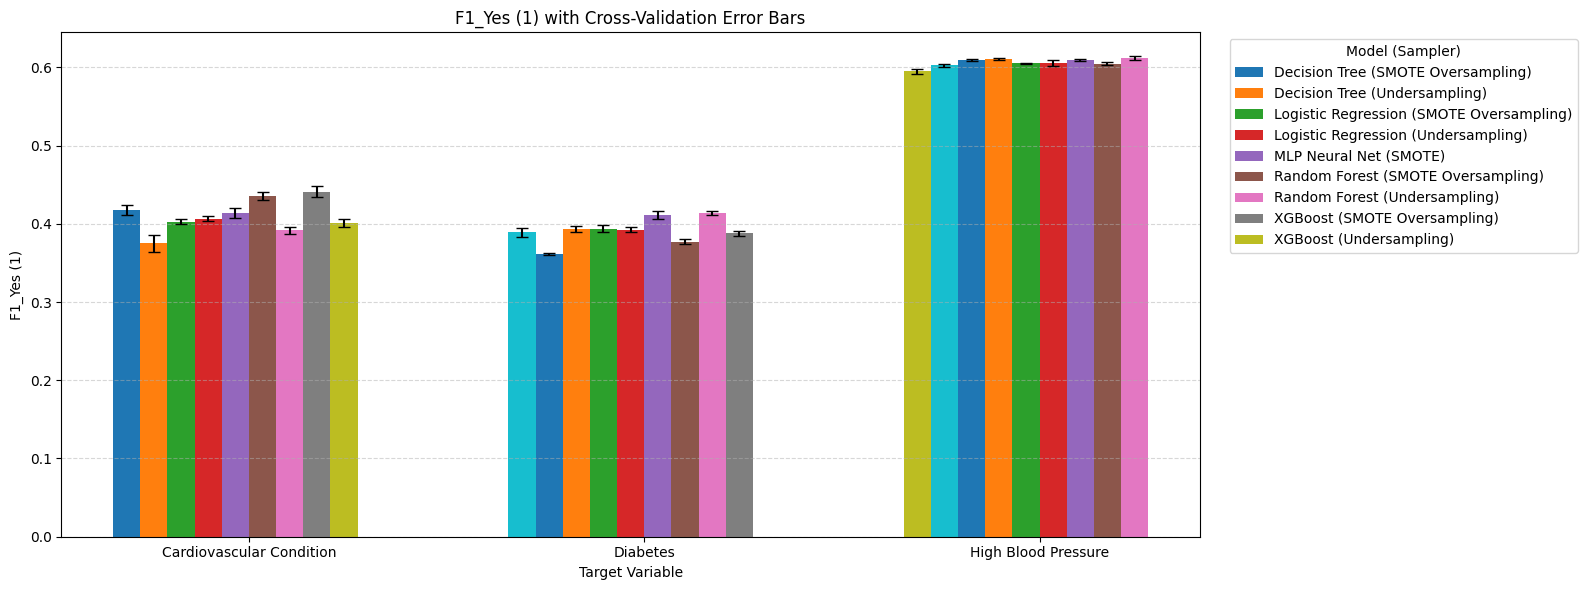

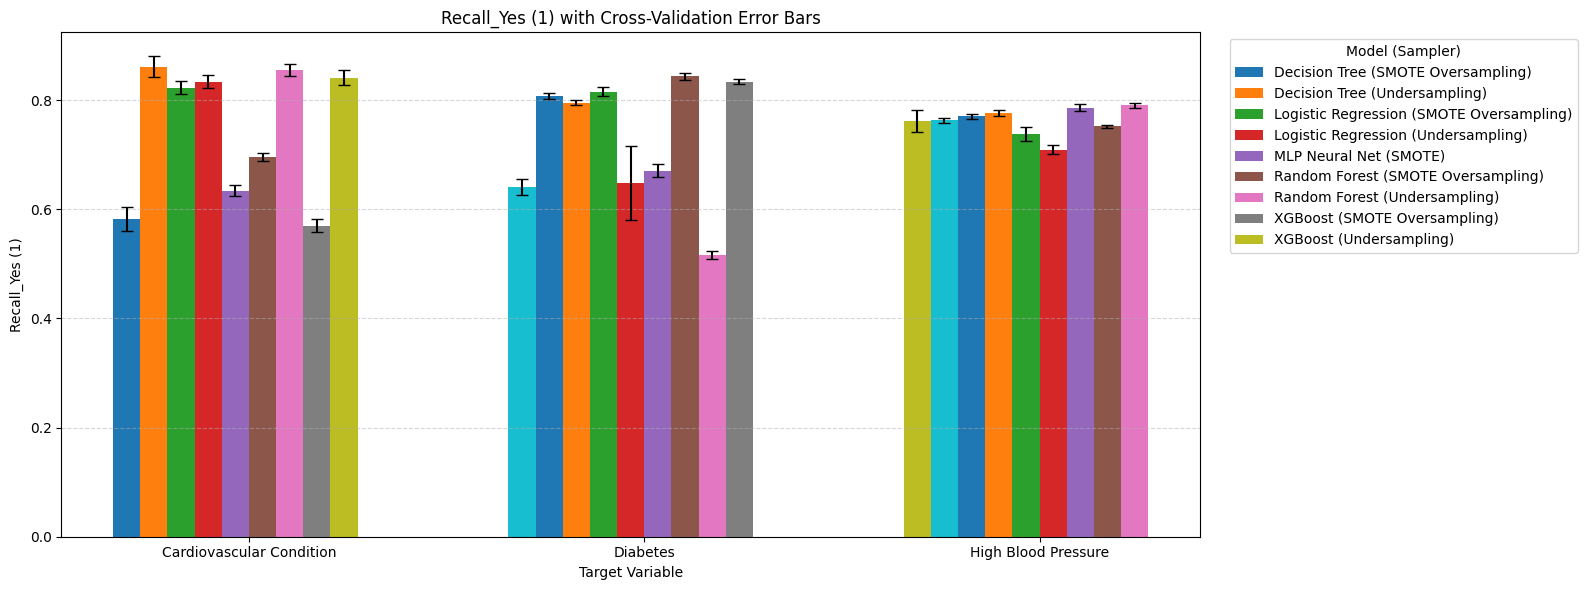

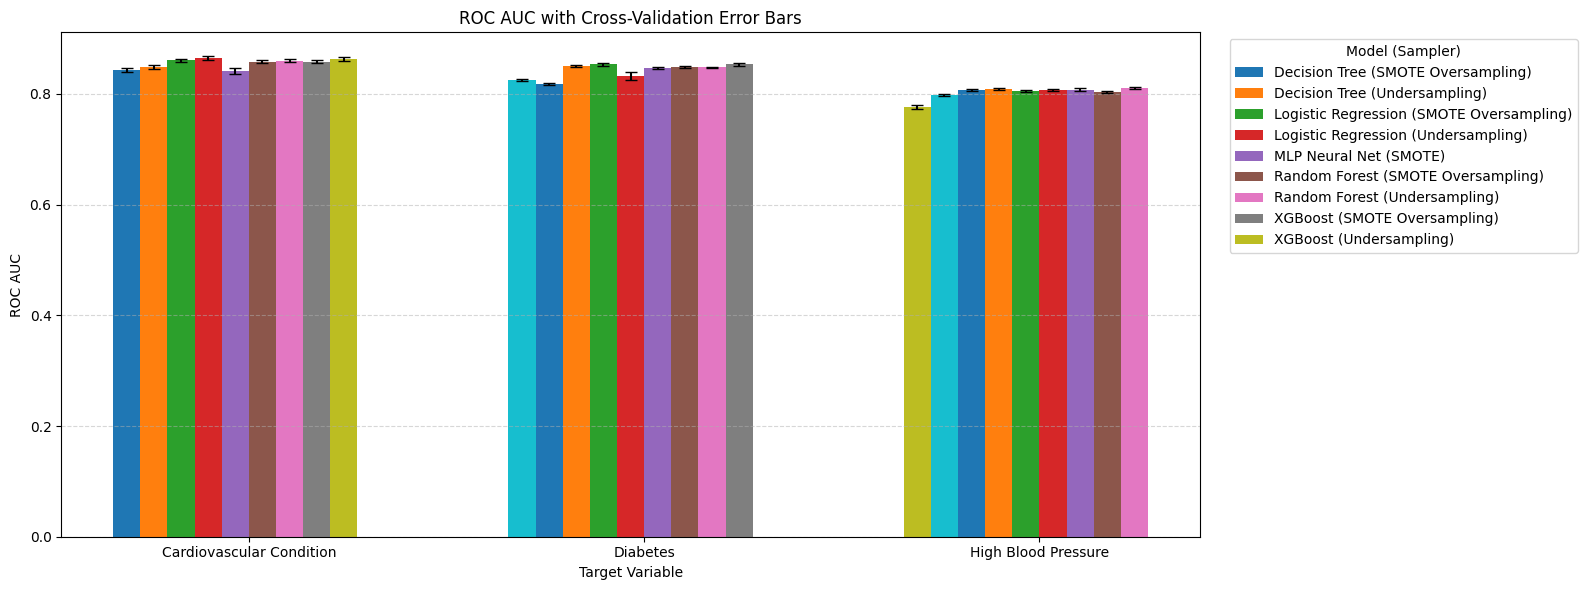

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Load the combined evaluation results
df = pd.read_csv("results/final_combined_model_evaluation.csv")

# Add a combined label for model and sampler for easy plotting
df["Model Label"] = df["Model"] + " (" + df["Sampler"] + ")"

# Create directory to save plots
os.makedirs("results/plots", exist_ok=True)

# Define metric columns for plotting (mean + std from CV)
metric_info = {
    "F1_Yes (1)": ("F1_Yes_Mean_CV", "F1_Yes_Std_CV"),
    "Recall_Yes (1)": ("Recall_Yes_Mean_CV", "Recall_Yes_Std_CV"),
    "ROC AUC": ("ROC_AUC_Mean_CV", "ROC_AUC_Std_CV")
}

# Loop through each metric and plot with error bars
for metric, (mean_col, std_col) in metric_info.items():
    # Filter rows where CV values are available (MLP has CV; skip if "-")
    df_plot = df[(df[mean_col] != "-")].copy()

    # Convert mean and std columns to float for plotting
    df_plot[mean_col] = df_plot[mean_col].astype(float)
    df_plot[std_col] = df_plot[std_col].astype(float)

    # Group by target and model+sampler to get metric values
    grouped = df_plot.groupby(["Target", "Model Label"])[[mean_col, std_col]].mean().reset_index()

    # Unique targets and model combinations
    targets = grouped["Target"].unique()
    models = grouped["Model Label"].unique()

    # Layout tuning: width of each bar, spacing between groups
    width = 0.09
    total_groups = len(models)
    group_width = width * total_groups
    gap = 0.5

    x_labels = []
    x_ticks = []

    # Start plotting
    plt.figure(figsize=(16, 6))

    # Iterate through targets
    for i, target in enumerate(targets):
        base = i * (group_width + gap)  # starting x-position for the target group
        subset = grouped[grouped["Target"] == target]

        # Iterate through models
        for j, model in enumerate(models):
            row = subset[subset["Model Label"] == model]
            if row.empty:
                continue  # skip missing model-target combinations

            xpos = base + j * width
            plt.bar(
                xpos,
                row[mean_col].values[0],
                width=width,
                yerr=row[std_col].values[0],
                capsize=4,
                label=model if i == 0 else "",  # only label once
            )

        # Position the tick in the middle of each target group
        x_labels.append(target)
        x_ticks.append(base + (total_groups * width) / 2)

    # Plot settings
    plt.xticks(x_ticks, x_labels)
    plt.title(f"{metric} with Cross-Validation Error Bars")
    plt.xlabel("Target Variable")
    plt.ylabel(metric)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.legend(title="Model (Sampler)", bbox_to_anchor=(1.02, 1), loc='upper left')
    plt.tight_layout()

    # Save plot
    plt.savefig(f"results/plots/{metric.replace(' ', '_')}_errorbar_fixed.png", dpi=300)
    plt.show()


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load results
df = pd.read_csv("results/final_combined_model_evaluation.csv")
df["Model Label"] = df["Model"] + " (" + df["Sampler"] + ")"

# Output folders
os.makedirs("results/tables", exist_ok=True)

# Final combined data for CSV
final_rows = []

# Process each target separately
for target in df["Target"].unique():
    df_target = df[df["Target"] == target].copy()
    df_target["AUC_Score"] = df_target["ROC AUC"].astype(float)

    top5 = df_target.sort_values(by="AUC_Score", ascending=False).head(5)

    # Collect table data
    table_data = []
    print(f"\n Top 5 Models – {target}")
    print("-" * 60)

    for _, row in top5.iterrows():
        model = f"{row['Model']} ({row['Sampler']})"
        auc = f"{row['ROC AUC']:.3f} ± {row['ROC_AUC_Std_CV']:.3f}"
        recall = f"{row['Recall_Yes (1)']:.3f} ± {row['Recall_Yes_Std_CV']:.3f}"
        f1 = f"{row['F1_Yes (1)']:.3f} ± {row['F1_Yes_Std_CV']:.3f}"

        table_data.append([model, auc, recall, f1])
        final_rows.append({
            "Target": target,
            "Model": model,
            "ROC AUC": auc,
            "Recall (Yes)": recall,
            "F1 (Yes)": f1
        })

        # Print to console as well
        print(f"{model:<45} | AUC: {auc} | Recall: {recall} | F1: {f1}")

    # === Plot table ===
    fig, ax = plt.subplots(figsize=(12, 2.5 + len(table_data)*0.6))  # wider for model names
    ax.axis("off")
    tbl = ax.table(
        cellText=table_data,
        colLabels=["Model", "ROC AUC", "Recall (Yes)", "F1 (Yes)"],
        cellLoc='center',
        colWidths=[0.45, 0.18, 0.18, 0.18],  # custom width
        loc='center'
    )
    tbl.auto_set_font_size(False)
    tbl.set_fontsize(10)
    tbl.scale(1, 1.5)
    ax.set_title(f"Top 5 Models by ROC AUC – {target}", fontsize=13, pad=20)

    plt.tight_layout()
    plt.savefig(f"results/tables/{target.replace(' ', '_')}_Top5_By_AUC_Table.png", dpi=300)
    plt.close()

# Save final CSV
final_df = pd.DataFrame(final_rows)
final_df.to_csv("results/top5_models_per_target.csv", index=False)

print("\n All tables saved to 'results/tables/' and summary CSV written to 'results/top5_models_per_target.csv'")



 Top 5 Models – High Blood Pressure
------------------------------------------------------------
XGBoost (Undersampling)                       | AUC: 0.810 ± 0.002 | Recall: 0.797 ± 0.004 | F1: 0.614 ± 0.002
Logistic Regression (Undersampling)           | AUC: 0.810 ± 0.002 | Recall: 0.784 ± 0.005 | F1: 0.615 ± 0.002
Random Forest (Undersampling)                 | AUC: 0.808 ± 0.002 | Recall: 0.787 ± 0.007 | F1: 0.615 ± 0.001
Logistic Regression (SMOTE Oversampling)      | AUC: 0.807 ± 0.002 | Recall: 0.782 ± 0.004 | F1: 0.616 ± 0.001
Random Forest (SMOTE Oversampling)            | AUC: 0.807 ± 0.002 | Recall: 0.708 ± 0.008 | F1: 0.606 ± 0.004

 Top 5 Models – Diabetes
------------------------------------------------------------
XGBoost (Undersampling)                       | AUC: 0.853 ± 0.003 | Recall: 0.822 ± 0.005 | F1: 0.385 ± 0.003
Logistic Regression (Undersampling)           | AUC: 0.853 ± 0.002 | Recall: 0.799 ± 0.008 | F1: 0.390 ± 0.005
XGBoost (SMOTE Oversampling)          

#  Final Model Selection & Justification

###  Objective

To build effective, interpretable, and scalable screening models for:
- **High Blood Pressure**
- **Diabetes**
- **Cardiovascular Condition (Heart disease or stroke)**

These models are intended for **screening**, not diagnosis — meaning we prioritize **recall** to **identify at-risk individuals early**, even at the cost of some false positives.

---

###  Evaluation Approach

We compared:
- **Logistic Regression**
- **Decision Tree**
- **Random Forest**
- **XGBoost**
- **MLP (Neural Network)**

Using:
- **Undersampling** and **SMOTE Oversampling**

And evaluated with:
- **Recall (Yes):** to prioritize identifying positive cases  
- **F1 Score (Yes):** to balance recall and precision  
- **ROC AUC:** for overall class separation

---

###  Metric Prioritization Strategy

We followed a **hierarchical** evaluation strategy:

1. **Recall (Yes)** — top priority in screening  
2. **F1 Score (Yes)** — checks if recall is meaningful  
3. **ROC AUC** — overall separability

This ensured models are **practically useful, reliable, and scalable** in healthcare settings.

---

###  Insights from Top 5 Evaluation

From the top 5 models per target:

- **High Blood Pressure:**  
  - Highest Recall: **XGBoost (Undersampling)** – 0.797  
  - Best AUC: **XGBoost / LogReg** – 0.810  
  - Most balanced: **LogReg (Undersampling)** → Recall 0.784, F1 0.615, AUC 0.810

- **Diabetes:**  
  - Highest Recall: **Random Forest (Undersampling)** – 0.826  
  - Best AUC: **XGBoost (Undersampling)** – 0.853  
  - Most balanced: **LogReg (Undersampling)** → Recall 0.799, F1 0.390, AUC 0.853

- **Cardiovascular Condition:**  
  - Highest Recall: **Random Forest (Undersampling)** – 0.848  
  - Best AUC: **XGBoost / LogReg (Undersampling)** – 0.856  
  - Most interpretable and consistent: **LogReg (Undersampling)** → Recall 0.814, F1 0.396

---

###  Final Model Selection

We selected **Logistic Regression (Undersampling)** for **all three targets** based on performance, simplicity, and interpretability:

| Condition             | Final Model                        | Rationale |
|----------------------|-------------------------------------|-----------|
| High Blood Pressure   | Logistic Regression (Undersample)  | High AUC, reliable recall (0.784), interpretable |
| Diabetes              | Logistic Regression (Undersample)  | Balanced metrics: AUC 0.853, Recall 0.799 |
| Cardiovascular Risk   | Logistic Regression (Undersample)  | Strong performance across all metrics, AUC 0.856 |

> While other models like XGBoost and Random Forest showed slightly better recall, **Logistic Regression** offered the **most stable and interpretable choice**, which is crucial for public health screening tools.

---

###  Deployment Plan

Next steps:

- Retrain final Logistic Regression (Undersample) models for all three targets  
- Save and deploy as part of a unified prediction pipeline  
- Extract **coefficients** for each model to generate **interpretability plots**  
- Package into a **Streamlit-based app** or public-facing screening tool

This unified and interpretable solution supports **trust, explainability, and scalability** in real-world health screening.


### Training **Logistic Regression (Undersampling)** for **all three targets**

In [12]:
import pandas as pd
import joblib
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

# Training Function
def train_and_save_model(data_path, target_variable, model_filename, preprocessor_filename, test_csv_filename):
    print(f"\nTraining and Saving model for: {target_variable}")

    # Load and filter
    df = pd.read_csv(data_path)
    df = df[df[target_variable] != "Unknown"]

    X = df.drop(columns=[target_variable])
    y = df[target_variable]

    # Split into train and test (test remains untouched/unbalanced)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, test_size=0.2, random_state=42
    )

    # Preprocessor
    categorical_features = X.columns.tolist()
    preprocessor = ColumnTransformer([
        ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

    # Model pipeline (with undersampling only on training)
    pipe = ImbPipeline([
        ("preprocessor", preprocessor),
        ("undersample", RandomUnderSampler(random_state=42)),
        ("model", LogisticRegression(C=1, max_iter=1000, class_weight="balanced", random_state=42))
    ])

    # Fit model
    pipe.fit(X_train, y_train)

    # Ensure output folders exist
    os.makedirs(os.path.dirname(model_filename), exist_ok=True)
    os.makedirs(os.path.dirname(preprocessor_filename), exist_ok=True)
    os.makedirs(os.path.dirname(test_csv_filename), exist_ok=True)

    # Save model and preprocessor
    joblib.dump(pipe, model_filename)
    joblib.dump(preprocessor, preprocessor_filename)
    print(f" Saved model: {model_filename}")
    print(f" Saved preprocessor: {preprocessor_filename}")

    # Save test data (original distribution)
    test_df = X_test.copy()
    test_df[target_variable] = y_test
    test_df.to_csv(test_csv_filename, index=False)
    print(f" Saved held-out test set: {test_csv_filename}")

# Run for all three models
train_and_save_model(
    data_path="ModellingDataset/model1_high_bp.csv",
    target_variable="Has a high blood pressure",
    model_filename="FinalModelDetails/model_highbp.pkl",
    preprocessor_filename="FinalModelDetails/preprocessor_highbp.pkl",
    test_csv_filename="FinalModelDetails/test_highbp.csv"
)

train_and_save_model(
    data_path="ModellingDataset/model2_diabetes.csv",
    target_variable="Has diabetes",
    model_filename="FinalModelDetails/model_diabetes.pkl",
    preprocessor_filename="FinalModelDetails/preprocessor_diabetes.pkl",
    test_csv_filename="FinalModelDetails/test_diabetes.csv"
)

train_and_save_model(
    data_path="ModellingDataset/model3_cardio.csv",
    target_variable="Cardiovascular condition (Heart disease or stroke)",
    model_filename="FinalModelDetails/model_cardio.pkl",
    preprocessor_filename="FinalModelDetails/preprocessor_cardio.pkl",
    test_csv_filename="FinalModelDetails/test_cardio.csv"
)



Training and Saving model for: Has a high blood pressure
 Saved model: FinalModelDetails/model_highbp.pkl
 Saved preprocessor: FinalModelDetails/preprocessor_highbp.pkl
 Saved held-out test set: FinalModelDetails/test_highbp.csv

Training and Saving model for: Has diabetes
 Saved model: FinalModelDetails/model_diabetes.pkl
 Saved preprocessor: FinalModelDetails/preprocessor_diabetes.pkl
 Saved held-out test set: FinalModelDetails/test_diabetes.csv

Training and Saving model for: Cardiovascular condition (Heart disease or stroke)
 Saved model: FinalModelDetails/model_cardio.pkl
 Saved preprocessor: FinalModelDetails/preprocessor_cardio.pkl
 Saved held-out test set: FinalModelDetails/test_cardio.csv


# Logistic cofficients

###  Interpreting Logistic Regression Coefficients

In this step, we extract the learned coefficients from our trained logistic regression models to understand which features most strongly influence each health condition.

- Positive coefficients ➜ Increase likelihood of condition ("Yes")
- Negative coefficients ➜ Decrease likelihood of condition
- Features are ranked by absolute value of their coefficients

This helps us identify the **most influential predictors** for each disease risk in interpretable terms.


In [15]:
import os
import joblib
import pandas as pd
import matplotlib.pyplot as plt

def extract_logistic_coefficients(model_path, preprocessor_path, output_csv, plot_title=None, plot_path=None, top_n=7):
    """
    Extracts and plots logistic regression coefficients from a saved pipeline.

    Parameters:
    - model_path (str): Path to saved model .pkl file
    - preprocessor_path (str): Path to saved preprocessor .pkl file
    - output_csv (str): Output path to save coefficient table
    - plot_title (str): Title for the plot
    - plot_path (str): File path to save the plot image (PNG)
    - top_n (int): Number of top features to plot
    """

    # Load model and preprocessor
    model = joblib.load(model_path)
    preprocessor = joblib.load(preprocessor_path)

    # Get encoded feature names
    ohe_features = preprocessor.named_transformers_['cat'].get_feature_names_out(
        preprocessor.transformers[0][2]
    )

    # Extract coefficients
    coefficients = model.named_steps['model'].coef_[0]
    coef_df = pd.DataFrame({
        'Feature': ohe_features,
        'Coefficient': coefficients,
        'Abs_Coefficient': abs(coefficients)
    })

    # Sort and get top N
    coef_df_sorted = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

    # Create output folders if missing
    os.makedirs(os.path.dirname(output_csv), exist_ok=True)
    if plot_path:
        os.makedirs(os.path.dirname(plot_path), exist_ok=True)

    # Save CSV
    coef_df_sorted.to_csv(output_csv, index=False)

    # Plot top N
    top_features = coef_df_sorted.head(top_n)
    colors = ['orange' if val > 0 else 'teal' for val in top_features['Coefficient']]

    # Nicely wrapped labels
    wrapped_labels = [
        label.replace("_", " ")
             .replace(" - ", "\n")
             .replace(" (", "\n(")
        for label in top_features["Feature"]
    ]

    plt.figure(figsize=(10, 6))
    plt.barh(wrapped_labels, top_features["Coefficient"], color=colors)
    plt.axvline(0, color='black', linestyle='--')
    plt.xlabel("Coefficient (Log-Odds)")
    plt.title(plot_title or "Top Logistic Regression Features")
    plt.tight_layout()
    plt.gca().invert_yaxis()

    if plot_path:
        plt.savefig(plot_path, dpi=300)
    plt.show()

    print(f"Coefficients saved to: {output_csv}")
    if plot_path:
        print(f" Plot saved to: {plot_path}")

    return coef_df_sorted


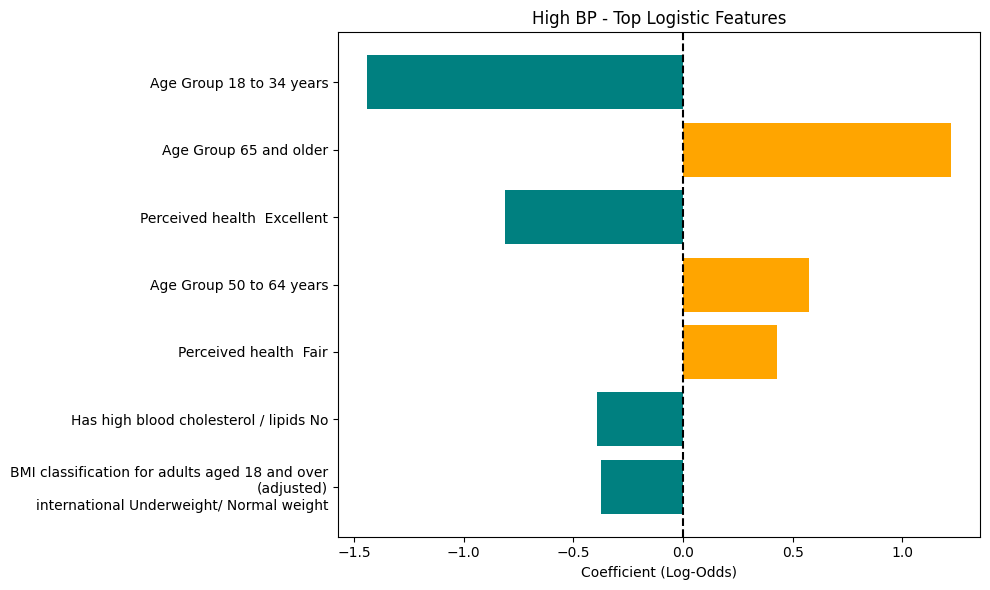

Coefficients saved to: cofficientOutput/logreg_coefficients_highbp.csv
 Plot saved to: cofficientOutput/logreg_plot_highbp.png


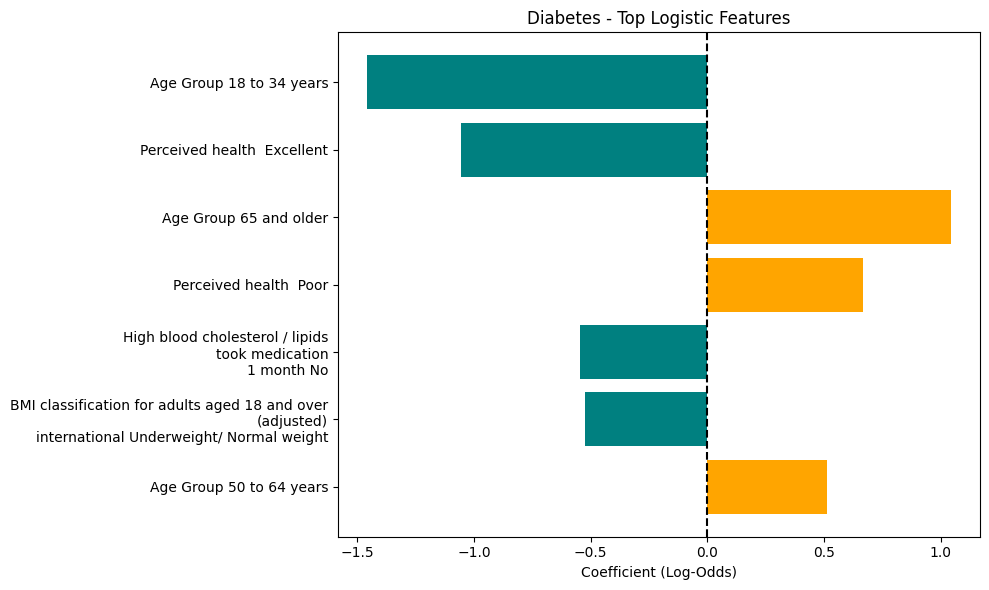

Coefficients saved to: cofficientOutput/logreg_coefficients_diabetes.csv
 Plot saved to: cofficientOutput/logreg_plot_diabetes.png


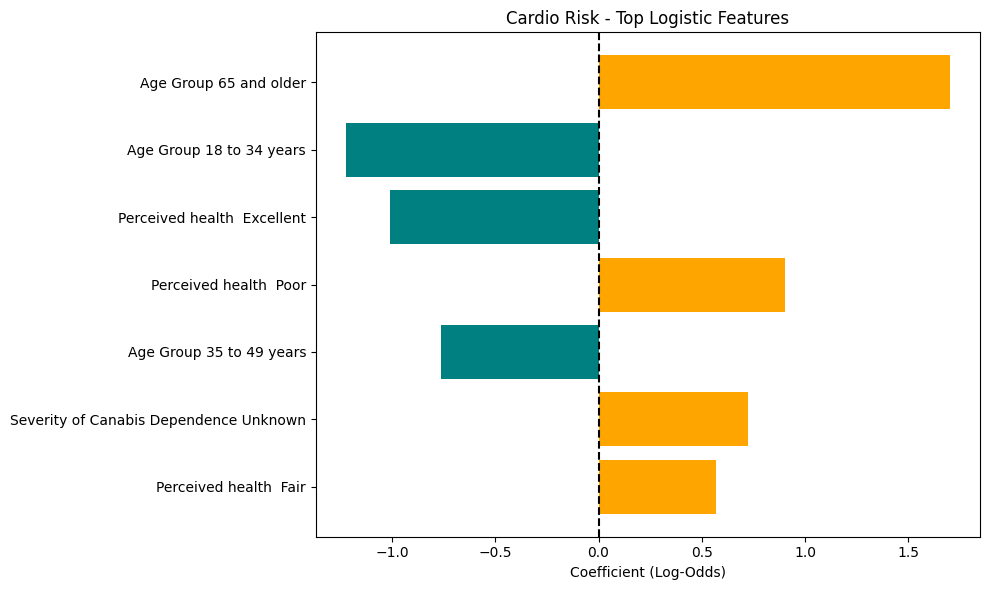

Coefficients saved to: cofficientOutput/logreg_coefficients_cardio.csv
 Plot saved to: cofficientOutput/logreg_plot_cardio.png


,Feature,Coefficient,Abs_Coefficient
3,Age Group_65 and older,1.701111,1.701111
0,Age Group_18 to 34 years,-1.223254,1.223254
40,Perceived health _Excellent,-1.007982,1.007982
43,Perceived health _Poor,0.902119,0.902119
1,Age Group_35 to 49 years,-0.762169,0.762169
...,...,...,...
55,Satisfaction with life in general _Very Satisfied,0.007717,0.007717
61,Seasonal flu shot - last time_Less than 1 year...,0.006073,0.006073
85,"Has an anxiety disorder (phobia, OCD, panic)_No",0.005850,0.005850
42,Perceived health _Good,0.003904,0.003904


In [16]:
# Run this one-by-one for each model
extract_logistic_coefficients(
    model_path="FinalModelDetails/model_highbp.pkl",
    preprocessor_path="FinalModelDetails/preprocessor_highbp.pkl",
    output_csv="cofficientOutput/logreg_coefficients_highbp.csv",
    plot_title="High BP - Top Logistic Features",
    plot_path="cofficientOutput/logreg_plot_highbp.png"
)

extract_logistic_coefficients(
    model_path="FinalModelDetails/model_diabetes.pkl",
    preprocessor_path="FinalModelDetails/preprocessor_diabetes.pkl",
    output_csv="cofficientOutput/logreg_coefficients_diabetes.csv",
    plot_title="Diabetes - Top Logistic Features",
    plot_path="cofficientOutput/logreg_plot_diabetes.png"
)

extract_logistic_coefficients(
    model_path="FinalModelDetails/model_cardio.pkl",
    preprocessor_path="FinalModelDetails/preprocessor_cardio.pkl",
    output_csv="cofficientOutput/logreg_coefficients_cardio.csv",
    plot_title="Cardio Risk - Top Logistic Features",
    plot_path="cofficientOutput/logreg_plot_cardio.png"
)


##  Generate Prediction Probabilities for ROC-AUC Evaluation

In this step, we are generating the predicted probabilities (`y_proba`) for the "Yes" class for each of our three models:

1. Has a high blood pressure  
2. Has diabetes  
3. Cardiovascular condition (Heart disease or stroke)

We save these predictions into CSV files to:
- Plot ROC-AUC curves later
- Compare model discrimination power
- Visualize true vs predicted probabilities

>  NOTE: Since we saved each model as a `Pipeline` (preprocessor + classifier), we do **not** manually preprocess the input — the model handles it internally.


###  Step: Generate Prediction Probabilities for ROC-AUC

In this step, we use our trained logistic regression pipelines to generate **probability predictions** on the full held-out dataset (not undersampled). This is necessary to evaluate model performance using **ROC-AUC**.

- We use `predict_proba()` to get probabilities for the `"Yes"` class.
- We store both the true label and predicted probability in a CSV file.
- These files will be used in the next step for ROC curve and threshold tuning.

This ensures we evaluate our models fairly and consistently on real-world distributions.


In [18]:
import pandas as pd
import joblib


def generate_predictions(data_path, target_col, model_file, output_csv):
    """
    Generate probability predictions using trained model pipeline (with preprocessor inside)
    and save them to a CSV file with true and predicted labels.
    """
    # Load data and model
    df = pd.read_csv(data_path)
    
    # Optional: Remove unknowns in target
    df = df[df[target_col].isin(["Yes", "No"])]

    model = joblib.load(model_file)

    # Separate features and target
    X = df.drop(columns=[target_col])
    y = df[target_col].map({"No": 0, "Yes": 1})

    # Predict probabilities
    y_proba = model.predict_proba(X)[:, 1]

    # Save predictions
    pred_df = pd.DataFrame({
        'y_true': y,
        'y_proba': y_proba
    })

    # Create output directory if it doesn’t exist
    os.makedirs(os.path.dirname(output_csv), exist_ok=True)

    pred_df.to_csv(output_csv, index=False)
    print(f" Saved predictions to {output_csv}")



#  Run for all 3 models 

# Model 1: High Blood Pressure
generate_predictions(
    data_path="FinalModelDetails/test_highbp.csv",
    target_col="Has a high blood pressure",
    model_file="FinalModelDetails/model_highbp.pkl",
    output_csv="ROC_AUC/predictions_highbp.csv"
)

# Model 2: Diabetes
generate_predictions(
    data_path="FinalModelDetails/test_diabetes.csv",
    target_col="Has diabetes",
    model_file="FinalModelDetails/model_diabetes.pkl",
    output_csv="ROC_AUC/predictions_diabetes.csv"
)

# Model 3: Cardiovascular
generate_predictions(
    data_path="FinalModelDetails/test_cardio.csv",
    target_col="Cardiovascular condition (Heart disease or stroke)",
    model_file="FinalModelDetails/model_cardio.pkl",
    output_csv="ROC_AUC/predictions_cardio.csv"
)


 Saved predictions to ROC_AUC/predictions_highbp.csv
 Saved predictions to ROC_AUC/predictions_diabetes.csv
 Saved predictions to ROC_AUC/predictions_cardio.csv


##  Final Evaluation using ROC-AUC

In this final modeling step, we evaluate our trained **logistic regression models** for each target condition using the **ROC-AUC metric** (Receiver Operating Characteristic - Area Under Curve).

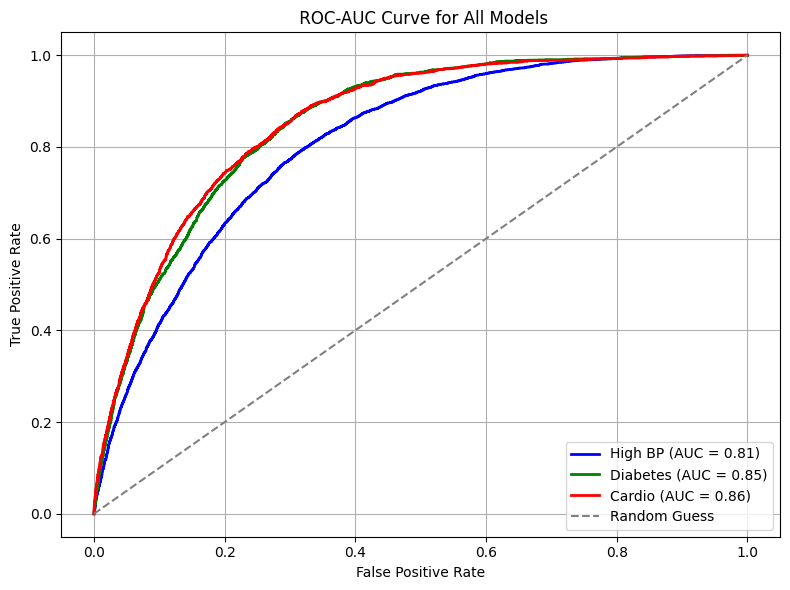

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, auc

#  Helper function to plot ROC and return AUC
def plot_roc_auc(pred_csv, label, color, individual_plot_path=None):
    """
    Reads predictions from CSV, computes ROC curve, and returns AUC value.
    Optionally saves the individual ROC plot.
    """
    df = pd.read_csv(pred_csv)

    # Drop rows where target is missing (due to 'Unknown' during generation)
    df = df.dropna(subset=["y_true"])

    y_true = df["y_true"]
    y_proba = df["y_proba"]

    # Compute ROC
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    roc_auc = auc(fpr, tpr)

    # Plot individual if requested
    if individual_plot_path:
        plt.figure(figsize=(6, 5))
        plt.plot(fpr, tpr, color=color, lw=2, label=f"{label} (AUC = {roc_auc:.2f})")
        plt.plot([0, 1], [0, 1], color="gray", linestyle="--", label="Random Guess")
        plt.title(f"ROC Curve - {label}")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend(loc="lower right")
        plt.grid(True)
        plt.tight_layout()
        plt.savefig(individual_plot_path)
        plt.close()

    return fpr, tpr, roc_auc

# ===  Combined ROC-AUC Plot ===
plt.figure(figsize=(8, 6))

# Generate curves & individual plots
fpr_bp, tpr_bp, auc_bp = plot_roc_auc("ROC_AUC/predictions_highbp.csv", "High BP", "blue", "ROC_AUC/roc_highbp.png")
fpr_diabetes, tpr_diabetes, auc_diabetes = plot_roc_auc("ROC_AUC/predictions_diabetes.csv", "Diabetes", "green", "ROC_AUC/roc_diabetes.png")
fpr_cardio, tpr_cardio, auc_cardio = plot_roc_auc("ROC_AUC/predictions_cardio.csv", "Cardio", "red", "ROC_AUC/roc_cardio.png")

# Plot combined curves
plt.plot(fpr_bp, tpr_bp, color="blue", lw=2, label=f"High BP (AUC = {auc_bp:.2f})")
plt.plot(fpr_diabetes, tpr_diabetes, color="green", lw=2, label=f"Diabetes (AUC = {auc_diabetes:.2f})")
plt.plot(fpr_cardio, tpr_cardio, color="red", lw=2, label=f"Cardio (AUC = {auc_cardio:.2f})")

# Diagonal reference
plt.plot([0, 1], [0, 1], color="gray", linestyle="--", label="Random Guess")

# Final plot formatting
plt.title(" ROC-AUC Curve for All Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.savefig("ROC_AUC/roc_auc_all_models.png")
plt.show()

# Print AUC Scores
# print(" AUC Scores:")
# print(f" High Blood Pressure: {auc_bp:.3f}")
# print(f" Diabetes: {auc_diabetes:.3f}")
# print(f" Cardiovascular Condition: {auc_cardio:.3f}")


##  Final Evaluation on Held-Out Test Sets (Real-World Performance)

In this step, we perform a comprehensive evaluation of our final **Logistic Regression models** on the **held-out test datasets** (20% split, never seen during training). This allows us to estimate **real-world performance** using:

-  **Confusion Matrix** — Actual vs Predicted breakdown  
-  **Classification Report** — Precision, Recall, F1 Score, Accuracy  
-  **ROC-AUC Score** — Model's ability to rank positives over negatives  
-  **Probability-based predictions** (used for threshold tuning later)

These evaluations confirm the effectiveness and generalization of each model under realistic, non-resampled distributions. All reports and plots are saved for documentation and comparison.


In [22]:
import pandas as pd
import joblib
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score
)

def evaluate_final_model(model_file, test_csv, target_col, label, output_dir="final_metrics/"):
    # Ensure output directory exists
    os.makedirs(output_dir, exist_ok=True)

    # Load model and test data
    model = joblib.load(model_file)
    df = pd.read_csv(test_csv)
    df = df[df[target_col].isin(["Yes", "No"])]

    X_test = df.drop(columns=[target_col])
    y_true = df[target_col].map({"No": 0, "Yes": 1})

    # Predict labels and probabilities
    y_pred = model.predict(X_test)
    y_pred = pd.Series(y_pred).map({"No": 0, "Yes": 1})
    y_proba = model.predict_proba(X_test)[:, 1]

    # Metrics
    report = classification_report(y_true, y_pred, output_dict=True, zero_division=0)
    auc_score = roc_auc_score(y_true, y_proba)
    cm = confusion_matrix(y_true, y_pred)

    # Save classification report
    report_df = pd.DataFrame(report).transpose()
    report_path = os.path.join(output_dir, f"classification_report_{label}.csv")
    report_df.to_csv(report_path)
    print(f" Saved classification report to {report_path}")

    # Plot confusion matrix
    plt.figure(figsize=(4.5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["Predicted: No", "Predicted: Yes"],
                yticklabels=["Actual: No", "Actual: Yes"])
    plt.title(f"Confusion Matrix - {label}")
    plt.tight_layout()
    cm_path = os.path.join(output_dir, f"conf_matrix_{label}.png")
    plt.savefig(cm_path)
    plt.close()
    print(f" Saved confusion matrix to {cm_path}")

    # Print metrics summary
    print(f"\n Final Evaluation: {label}")
    print(f"ROC-AUC: {auc_score:.4f}")
    print(f"Recall (Yes): {report['1']['recall']:.4f}")
    #print(f"Precision (Yes): {report['1']['precision']:.4f}")
    print(f"F1 Score (Yes): {report['1']['f1-score']:.4f}")
    #print(f"Accuracy: {report['accuracy']:.4f}")


In [23]:
evaluate_final_model(
    model_file="FinalModelDetails/model_highbp.pkl",
    test_csv="FinalModelDetails/test_highbp.csv",
    target_col="Has a high blood pressure",
    label="HighBP"
)

evaluate_final_model(
    model_file="FinalModelDetails/model_diabetes.pkl",
    test_csv="FinalModelDetails/test_diabetes.csv",
    target_col="Has diabetes",
    label="Diabetes"
)

evaluate_final_model(
    model_file="FinalModelDetails/model_cardio.pkl",
    test_csv="FinalModelDetails/test_cardio.csv",
    target_col="Cardiovascular condition (Heart disease or stroke)",
    label="Cardio"
)


 Saved classification report to final_metrics/classification_report_HighBP.csv
 Saved confusion matrix to final_metrics/conf_matrix_HighBP.png

 Final Evaluation: HighBP
ROC-AUC: 0.8095
Recall (Yes): 0.7848
F1 Score (Yes): 0.6153
 Saved classification report to final_metrics/classification_report_Diabetes.csv
 Saved confusion matrix to final_metrics/conf_matrix_Diabetes.png

 Final Evaluation: Diabetes
ROC-AUC: 0.8524
Recall (Yes): 0.8025
F1 Score (Yes): 0.3901
 Saved classification report to final_metrics/classification_report_Cardio.csv
 Saved confusion matrix to final_metrics/conf_matrix_Cardio.png

 Final Evaluation: Cardio
ROC-AUC: 0.8562
Recall (Yes): 0.8140
F1 Score (Yes): 0.3959


##  Threshold Tuning – Prioritizing Recall for Screening

In this step, we refine our final logistic regression models by tuning the **decision threshold** used to convert predicted probabilities into class labels ("Yes" / "No").

### Why This Matters:
- The default threshold of `0.5` may not be ideal, especially in **screening** where **recall is more important than precision**.
- We use modified **Youden’s J statistic** to suggest an **optimal threshold** that maximizes `(Recall + Precision - 1)`.
- We then compare model performance at both:
  -  Default Threshold (e.g., 0.5)
  -  Optimal Threshold (Youden J)

### Output:
-  Plots showing how Precision & Recall vary by threshold
-  Classification reports and confusion matrices at both thresholds
-  Saved reports and visualizations in: `threshold_tuning/`

This process ensures we balance **early detection** with **false positives**, aligning the models with real-world screening priorities.


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix
import os

#  Threshold Tuning Function (prioritizing Recall for screening context)
def threshold_tuning_analysis(pred_csv, label, threshold=0.5, output_dir="threshold_tuning/"):
    os.makedirs(output_dir, exist_ok=True)

    # Load predictions
    df = pd.read_csv(pred_csv)
    df = df.dropna(subset=["y_true"])
    y_true = df["y_true"]
    y_proba = df["y_proba"]

    # Compute precision, recall, thresholds
    precision, recall, thresholds = precision_recall_curve(y_true, y_proba)

    #  Youden's J statistic to find optimal threshold
    j_scores = recall[:-1] + precision[:-1] - 1
    best_idx = j_scores.argmax()
    best_threshold = thresholds[best_idx]
    
    # Display optimal performance (optional but informative)
    print(f"\n Youden's Optimal Threshold = {best_threshold:.2f}")
    print(f"   Precision = {precision[best_idx]:.2f}, Recall = {recall[best_idx]:.2f}")

    # ===  Plot Precision & Recall vs Threshold ===
    plt.figure(figsize=(8, 5))
    plt.plot(thresholds, precision[:-1], label="Precision", color="blue")
    plt.plot(thresholds, recall[:-1], label="Recall", color="green")
    plt.axvline(threshold, color="red", linestyle="--", label=f"Default = {threshold}")
    plt.axvline(best_threshold, color="orange", linestyle="--", label=f"Youden = {best_threshold:.2f}")
    plt.title(f"Precision-Recall vs Threshold for {label}")
    plt.xlabel("Threshold")
    plt.ylabel("Score")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    plot_path = os.path.join(output_dir, f"threshold_plot_{label.lower().replace(' ', '_')}.png")
    plt.savefig(plot_path)
    plt.show()
    print(f" Plot saved to: {plot_path}")

    # ===  Evaluation at Default Threshold ===
    print(f"\n Evaluation at Default Threshold = {threshold}")
    y_pred_default = (y_proba >= threshold).astype(int)
    #print(classification_report(y_true, y_pred_default, zero_division=0))
    #print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred_default))

    # ===  Evaluation at Optimal Threshold ===
    print(f"\n Evaluation at Youden's Optimal Threshold = {best_threshold:.2f}")
    y_pred_best = (y_proba >= best_threshold).astype(int)
    #print(classification_report(y_true, y_pred_best, zero_division=0))
    #print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred_best))

    # Save reports
    report_default = pd.DataFrame(
        classification_report(y_true, y_pred_default, output_dict=True, zero_division=0)
    ).transpose()
    
    report_best = pd.DataFrame(
        classification_report(y_true, y_pred_best, output_dict=True, zero_division=0)
    ).transpose()

    report_default.to_csv(os.path.join(output_dir, f"classification_default_{label.lower().replace(' ', '_')}.csv"))
    report_best.to_csv(os.path.join(output_dir, f"classification_optimal_{label.lower().replace(' ', '_')}.csv"))

    print(" Classification reports saved.\n")



 Youden's Optimal Threshold = 0.23
   Precision = 0.40, Recall = 0.96


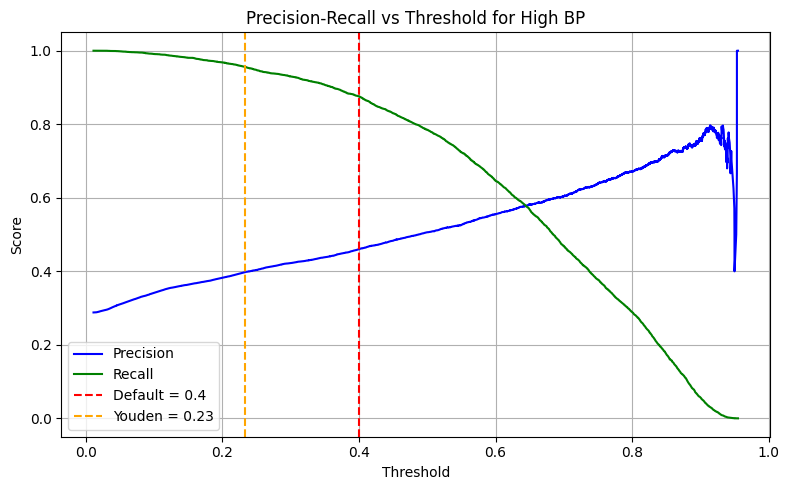

 Plot saved to: threshold_tuning/threshold_plot_high_bp.png

 Evaluation at Default Threshold = 0.4

 Evaluation at Youden's Optimal Threshold = 0.23
 Classification reports saved.


 Youden's Optimal Threshold = 0.24
   Precision = 0.19, Recall = 0.96


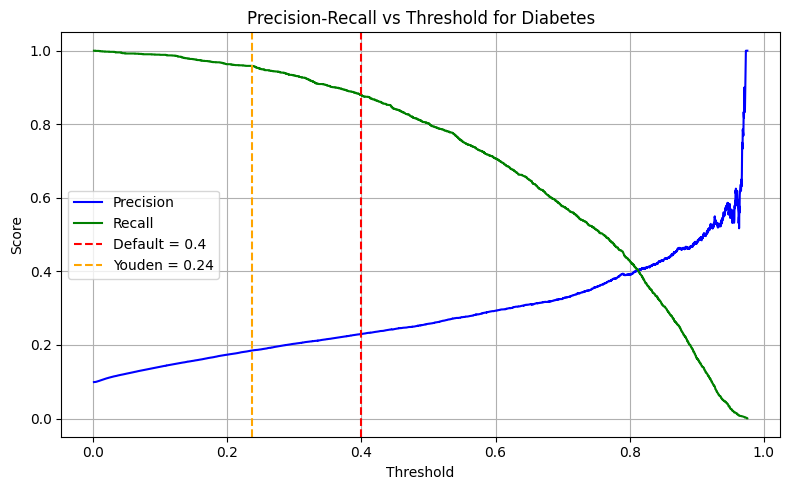

 Plot saved to: threshold_tuning/threshold_plot_diabetes.png

 Evaluation at Default Threshold = 0.4

 Evaluation at Youden's Optimal Threshold = 0.24
 Classification reports saved.


 Youden's Optimal Threshold = 0.24
   Precision = 0.19, Recall = 0.95


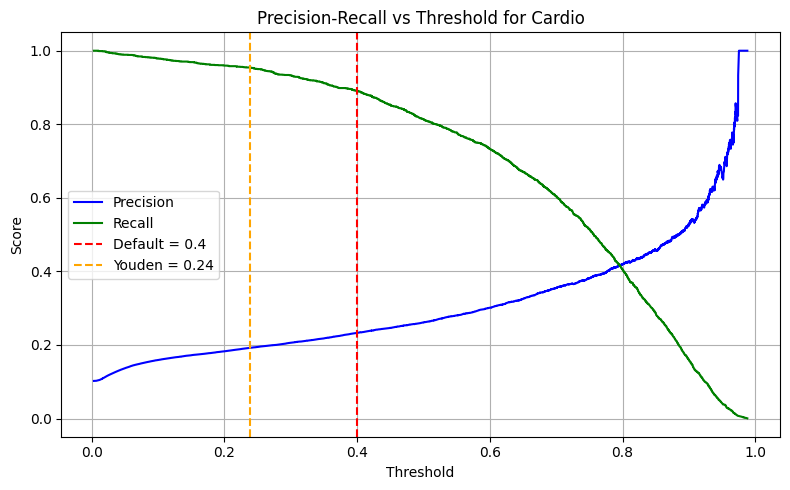

 Plot saved to: threshold_tuning/threshold_plot_cardio.png

 Evaluation at Default Threshold = 0.4

 Evaluation at Youden's Optimal Threshold = 0.24
 Classification reports saved.



In [25]:
threshold_tuning_analysis("ROC_AUC/predictions_highbp.csv", "High BP", threshold=0.4)
threshold_tuning_analysis("ROC_AUC/predictions_diabetes.csv", "Diabetes", threshold=0.4)
threshold_tuning_analysis("ROC_AUC/predictions_cardio.csv", "Cardio", threshold=0.4)


###  Final Model Performance Summary – Default vs Youden Thresholds

| Condition      | Threshold Type | Precision (Yes) | Recall (Yes) | F1 (Yes) |
|----------------|----------------|------------------|--------------|----------|
| **High BP**    | Default        | 0.46             | 0.88         | 0.60     |
|                | Youden         | 0.40             | 0.96         | 0.56     |
| **Diabetes**   | Default        | 0.23             | 0.88         | 0.36     |
|                | Youden         | 0.19             | 0.96         | 0.31     |
| **Cardio**     | Default        | 0.23             | 0.89         | 0.37     |
|                | Youden         | 0.19             | 0.95         | 0.32     |

---

>  **Insight**: Youden’s threshold consistently increases **recall** for all three models — ensuring more at-risk individuals are identified. While precision and F1 drop slightly, this trade-off is intentional and acceptable in a **screening context**, where **missing true cases is riskier than flagging false positives**.


##  Final Model Evaluation with Tuned Thresholds (Youden's J)

In this step, we apply the **custom thresholds** (identified via Youden's J statistic during threshold tuning) to each of our final logistic regression models. 

Instead of the default `0.5` threshold, we use optimized thresholds to improve **Recall**, which is critical for **early screening**.

###  What This Code Does:
- Loads the saved model pipeline and held-out test set.
- Applies the **best-performing threshold**:
  - High BP → 0.23  
  - Diabetes → 0.24  
  - Cardiovascular Condition → 0.24
- Computes:
  - **Confusion Matrix**
  - **Precision / Recall / F1-score** at the selected threshold
- Saves the classification report as CSV files for each target condition.

>  Note: **ROC AUC does not change**, as it is threshold-independent. This step only changes the **decision boundary** for classification.

This is the final evaluation step before deploying our models for real-world use.


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import joblib
import os

# === Evaluation Function with Confusion Matrix Plotting ===
def evaluate_with_threshold(label, model_file, test_file, threshold, target_col, output_dir="final_threshold_applied"):
    os.makedirs(output_dir, exist_ok=True)

    print(f"\n Evaluating: {label} at threshold = {threshold:.2f}")
    
    # Load model and data
    model = joblib.load(model_file)
    df = pd.read_csv(test_file)
    
    # Separate features and target
    X = df.drop(columns=[target_col])
    y_true = df[target_col].map({"No": 0, "Yes": 1})

    # Predict probabilities
    y_proba = model.predict_proba(X)[:, 1]
    y_pred = (y_proba >= threshold).astype(int)

    # === Classification Report & Confusion Matrix ===
    report = classification_report(y_true, y_pred, output_dict=True, zero_division=0)
    cm = confusion_matrix(y_true, y_pred)

    # Save report CSV
    report_df = pd.DataFrame(report).transpose()
    out_path = os.path.join(output_dir, f"classification_report_{label.lower().replace(' ', '_')}.csv")
    report_df.to_csv(out_path)
    print(f" Saved classification report to: {out_path}")

    # === Confusion Matrix Plot ===
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
    plt.title(f"Confusion Matrix - {label} (Threshold = {threshold:.2f})")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plot_path = os.path.join(output_dir, f"confusion_matrix_{label.lower().replace(' ', '_')}.png")
    plt.savefig(plot_path)
    plt.close()
    print(f" Saved confusion matrix plot to: {plot_path}")

    # Print summary
    # print(" Confusion Matrix:")
    # print(cm)
    # print("\n Classification Summary:")
    # print(report_df.loc[["0", "1", "macro avg", "weighted avg"]])


In [27]:
# === Configuration ===
model_paths = {
    "High BP": {
        "target_col": "Has a high blood pressure",
        "model_file": "FinalModelDetails/model_highbp.pkl",
        "test_file": "FinalModelDetails/test_highbp.csv",
        "threshold": 0.23
    },
    "Diabetes": {
        "target_col": "Has diabetes",
        "model_file": "FinalModelDetails/model_diabetes.pkl",
        "test_file": "FinalModelDetails/test_diabetes.csv",
        "threshold": 0.24
    },
    "Cardio": {
        "target_col": "Cardiovascular condition (Heart disease or stroke)",
        "model_file": "FinalModelDetails/model_cardio.pkl",
        "test_file": "FinalModelDetails/test_cardio.csv",
        "threshold": 0.24
    }
}

# === Run for all models ===
for label, details in model_paths.items():
    evaluate_with_threshold(
        label=label,
        model_file=details["model_file"],
        test_file=details["test_file"],
        threshold=details["threshold"],
        target_col=details["target_col"]
    )



 Evaluating: High BP at threshold = 0.23
 Saved classification report to: final_threshold_applied\classification_report_high_bp.csv
 Saved confusion matrix plot to: final_threshold_applied\confusion_matrix_high_bp.png

 Evaluating: Diabetes at threshold = 0.24
 Saved classification report to: final_threshold_applied\classification_report_diabetes.csv
 Saved confusion matrix plot to: final_threshold_applied\confusion_matrix_diabetes.png

 Evaluating: Cardio at threshold = 0.24
 Saved classification report to: final_threshold_applied\classification_report_cardio.csv
 Saved confusion matrix plot to: final_threshold_applied\confusion_matrix_cardio.png


### Backend Progressive Pred logic implementation 

In [28]:
def progressive_prediction(user_input_df):
    """
    Takes a single-row DataFrame of user inputs.
    Predicts missing targets in logical order: High BP → Diabetes → Cardio.
    Adds predictions to the DataFrame and returns it.
    """
    data = user_input_df.copy()

    # --- Step 1: Predict High BP if not provided ---
    if 'Has a high blood pressure' not in data.columns:
        proba = model_highbp.predict_proba(data)[0, 1]
        pred = int(proba >= thresh_highbp)
        data['Has a high blood pressure'] = "Yes" if pred == 1 else "No"
        data['Predicted_High_BP'] = proba

        # Add default medication value if not provided
        if "High blood pressure - took medication - 1 month" not in data.columns:
            data["High blood pressure - took medication - 1 month"] = "No"

    # --- Step 2: Predict Diabetes if not provided ---
    if 'Has diabetes' not in data.columns:
        proba = model_diabetes.predict_proba(data)[0, 1]
        pred = int(proba >= thresh_diabetes)
        data['Has diabetes'] = "Yes" if pred == 1 else "No"
        data['Predicted_Diabetes'] = proba

    # --- Step 3: Predict Cardio (always) ---
    proba = model_cardio.predict_proba(data)[0, 1]
    pred = int(proba >= thresh_cardio)
    data['Predicted_Cardiovascular Condition'] = "Yes" if pred == 1 else "No"
    data['Predicted_Cardio_Prob'] = proba

    return data


### Model Deployment Code using Streamlit

Below is the code snippet for deploying the final logistic regression models using Streamlit.

> **Note:** To actually run or deploy this as a web app, **save the code in a `.py` file** (e.g., `app.py`) and run it using:
>
> ```bash
> streamlit run app.py
> ```

This will launch an interactive web interface where users can input values and get predictions for:
- High Blood Pressure
- Diabetes
- Cardiovascular Condition

The app uses trained models and pre-processing pipelines built earlier in the project.


In [ ]:
import streamlit as st
import pandas as pd
import joblib

# Load models
model_highbp = joblib.load("FinalModelDetails/model_highbp.pkl")
model_diabetes = joblib.load("FinalModelDetails/model_diabetes.pkl")
model_cardio = joblib.load("FinalModelDetails/model_cardio.pkl")

# Thresholds
thresholds = {
    "highbp": 0.23,
    "diabetes": 0.24,
    "cardio": 0.24
}

# Feature options
feature_options = {
    "Age Group": ['18 to 34 years', '35 to 49 years', '50 to 64 years', '65 and older'],
    "Sex at Birth": ['Male', 'Female'],
    "Marital Status": [
        'Married/Common-law',
        'Widowed/Divorced/Separated/Single, never married'
    ],
    "Perceived health ": ['Poor', 'Fair', 'Good', 'Very good', 'Excellent'],
    "Perceived mental health ": ['Poor', 'Fair', 'Good', 'Very good', 'Excellent', 'Unknown'],
    "Satisfaction with life in general ": [
        'Very Satisfied', 'Satisfied', 'Neither satisfied nor dissatisfied', 'Dissatisfied', 'Unknown'
    ],
    "Smoking status": [
        'Non-smoker (abstainer or experimental)',
        'Former daily smoker (non-smoker now)',
        'Current daily smoker',
        'Former occasional smoker (non-smoker now)',
        'Current occasional smoker',
        'Unknown'
    ],
    "Used cannabis - 12 months": ['No', 'Yes', 'Unknown'],
    "Severity of Canabis Dependence": [
        'No cannabis use',
        'Takes cannabis but no dependence',
        'Takes cannabis & dependent on it',
        'Unknown'
    ],
    "Type of drinker": [
        'Regular drinker', 'Occasional drinker', 'Did not drink in the last 12 months'
    ],
    "Drank 5+ / 4+ drinks one occasion - frequency - 12 months": [
        'Never', 'Less than once a month', 'Once a month', '2-3 times a month', 'Once a week', 'More than once a week', 'Valid skip'
    ],
    "Total Household Income - All Sources": [
        '$80,000 or more', '$60,000 to $79,999', '$40,000 to $59,999', '$20,000 to $39,999', 'No income or less than $20,000', 'Unknown'
    ],
    "BMI classification for adults aged 18 and over (adjusted) - international": [
        'Underweight/ Normal weight', 'Overweight / Obese - Class I, II, III', 'Unknown'
    ],
    "Pain health status": ['Has usual pain or discomfort', 'No usual pain or discomfort'],
    "Has sleep apnea": ['No', 'Yes'],
    "Has high blood cholesterol / lipids": ['No', 'Yes', 'Unknown'],
    "High blood cholesterol / lipids - took medication - 1 month": ['No', 'Yes'],
    "Has chronic fatigue syndrome": ['No', 'Yes'],
    "Has a mood disorder (depression, bipolar, mania, dysthymia)": ['No', 'Yes'],
    "Has an anxiety disorder (phobia, OCD, panic)": ['No', 'Yes'],
    "Has respiratory chronic condition (asthma or COPD)": ['No', 'Yes', 'Unknown'],
    "Musculoskeletal condition (Arthritis, fibromyalgia, osteoporosis)": ['No', 'Yes', 'Unknown'],
    "Had a seasonal flu shot (excluding H1N1) - lifetime": ['No', 'Yes', 'Unknown'],
    "Seasonal flu shot - last time": [
        'Less than 1 year ago', '1 year to less than 2 years ago', '2 years ago or more', 'Valid skip', 'Unknown'
    ],
    "Usual place for immediate care for minor problem": ['Yes', 'No'],
    "Considered suicide - lifetime": ['No', 'Yes', 'Unknown'],
    "Considered suicide - last 12 months": ['No', 'Yes', 'Unknown'],
    "High blood pressure - took medication - 1 month": ['No', 'Yes'],
}

st.title(" Progressive Health Risk Predictor")
st.markdown("This tool predicts your health risks for high blood pressure, diabetes, and cardiovascular conditions.")

# --- Input Form ---
with st.form("user_input_form"):
    input_dict = {}
    st.subheader(" Lifestyle & Health Information")

    for feat, options in feature_options.items():
        friendly_label = feat.strip()
        choice = st.selectbox(friendly_label, options, key=feat)
        input_dict[feat] = choice

    bp_known = st.radio("Do you already know if you have high blood pressure?", ["Yes", "No"])
    if bp_known == "Yes":
        bp_val = st.selectbox("What is your blood pressure status?", ["Yes", "No"])
        input_dict['Has a high blood pressure'] = bp_val

    diab_known = st.radio("Do you already know if you have diabetes?", ["Yes", "No"])
    if diab_known == "Yes":
        diab_val = st.selectbox("What is your diabetes status?", ["Yes", "No"])
        input_dict['Has diabetes'] = diab_val

    submit = st.form_submit_button("🔍 Predict My Risk")

if submit:
    user_df = pd.DataFrame([input_dict])

    # --- Progressive Logic ---
    if 'Has a high blood pressure' not in user_df.columns:
        proba = model_highbp.predict_proba(user_df)[0][1]
        user_df['Has a high blood pressure'] = "Yes" if proba >= thresholds['highbp'] else "No"
        st.markdown(f" **Predicted High Blood Pressure**: {user_df['Has a high blood pressure'].iloc[0]} (prob: {proba:.2f})")

    if 'Has diabetes' not in user_df.columns:
        proba = model_diabetes.predict_proba(user_df)[0][1]
        user_df['Has diabetes'] = "Yes" if proba >= thresholds['diabetes'] else "No"
        st.markdown(f" **Predicted Diabetes**: {user_df['Has diabetes'].iloc[0]} (prob: {proba:.2f})")

    # --- Cardio Prediction ---
    cardio_proba = model_cardio.predict_proba(user_df)[0][1]
    cardio_pred = "Yes" if cardio_proba >= thresholds['cardio'] else "No"

    st.markdown("---")
    st.subheader(" Final Prediction")
    st.write(f"**Risk of Cardiovascular Condition (Heart disease or stroke)**: **{cardio_pred}**")
    st.write(f"**Predicted probability**: {cardio_proba:.2f}")
